# Basic Statistic Understanding
## Case : Credit Card Customers (Predict Churning Customers)

### 1. Original data



In [ ]:
#Import Library
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv')
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [ ]:
#Churn vs. Normal 
counts = data.Attrition_Flag.value_counts()
normal = counts[0]
Churn = counts[1]
perc_normal = (normal/(normal+Churn))*100
perc_Churn = (Churn/(normal+Churn))*100
print('There were {} non-Churn ({:.3f}%) and {} Churn ({:.3f}%).'.format(normal, perc_normal, Churn, perc_Churn))

There were 8500 non-Churn (83.934%) and 1627 Churn (16.066%).


In [ ]:
# data.groupby(['Attrition_Flag'], as_index=True)
existing_data = data[(data.Attrition_Flag == 'Existing Customer')]
attrited_data = data[(data.Attrition_Flag == 'Attrited Customer')]
existing_data.head(), attrited_data.head()

(   CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
 0  768805383  ...                                            0.99991                                                                                
 1  818770008  ...                                            0.99994                                                                                
 2  713982108  ...                                            0.99998                                                                                
 3  769911858  ...                                            0.99987                                                                                
 4  709106358  ...                                            0.99998                                                                                
 
 [5 rows x 23 columns],
     CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Co

## Numerical : Measures of Central Tendency & Measures of Dispersion

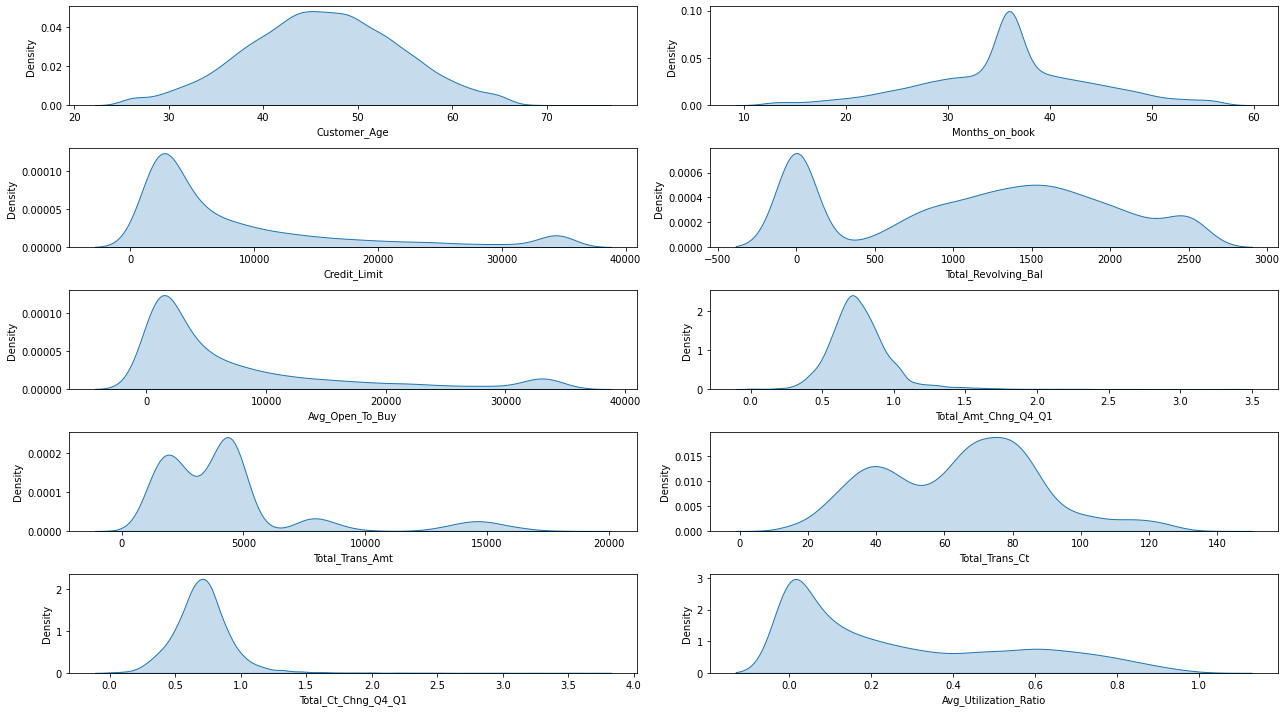

In [ ]:
num_cols = ['Customer_Age','Months_on_book','Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
            'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
fig, axes = plt.subplots(5,2, figsize=(18,10))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=col, ax=axes[i], fill=True)
plt.tight_layout()

### Customer Age

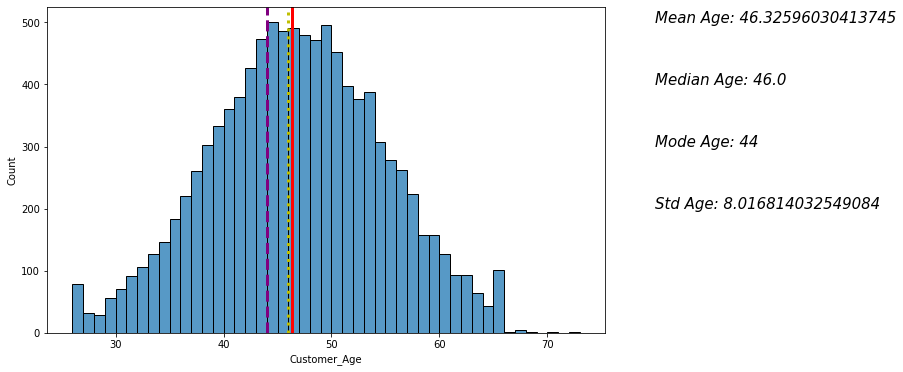

In [ ]:
# Distribution with Histplot

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Customer_Age', ax=ax)

plt.text(80, 200, "Std Age: " + str(data['Customer_Age'].std()), 
        style = 'italic', fontsize=15)
mode = data['Customer_Age'].mode()
plt.text(80, 300, "Mode Age: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(80, 400, "Median Age: " + str(data['Customer_Age'].median()), 
        style = 'italic', fontsize=15)
plt.text(80, 500, "Mean Age: " + str(data['Customer_Age'].mean()), 
        style = 'italic', fontsize=15)

average = data['Customer_Age'].mean()
median = data['Customer_Age'].median()
mode = data['Customer_Age'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

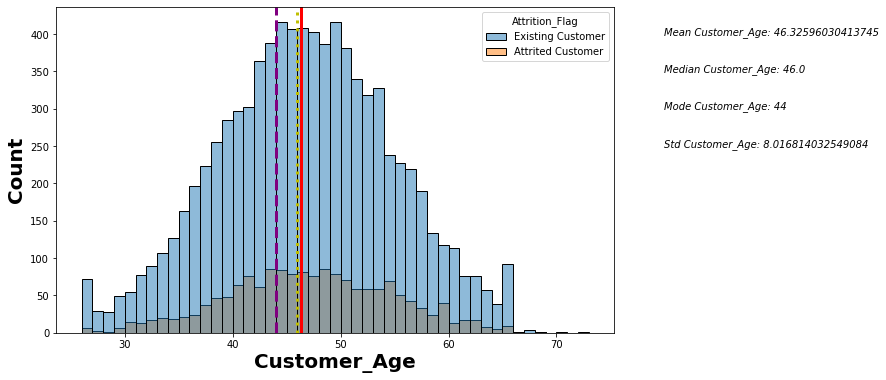

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Customer_Age', hue='Attrition_Flag', ax=ax)
plt.xlabel('Customer_Age', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(80, 250, "Std Customer_Age: " + str(data['Customer_Age'].std()), 
        style = 'italic', fontsize=10)
mode = data['Customer_Age'].mode()
plt.text(80, 300, "Mode Customer_Age: " + str(format(int(mode))), 
        style = 'italic', fontsize=10)
plt.text(80, 350, "Median Customer_Age: " + str(data['Customer_Age'].median()), 
        style = 'italic', fontsize=10)
plt.text(80, 400, "Mean Customer_Age: " + str(data['Customer_Age'].mean()), 
        style = 'italic', fontsize=10)

average = data['Customer_Age'].mean()
median = data['Customer_Age'].median()
mode = data['Customer_Age'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Months on book

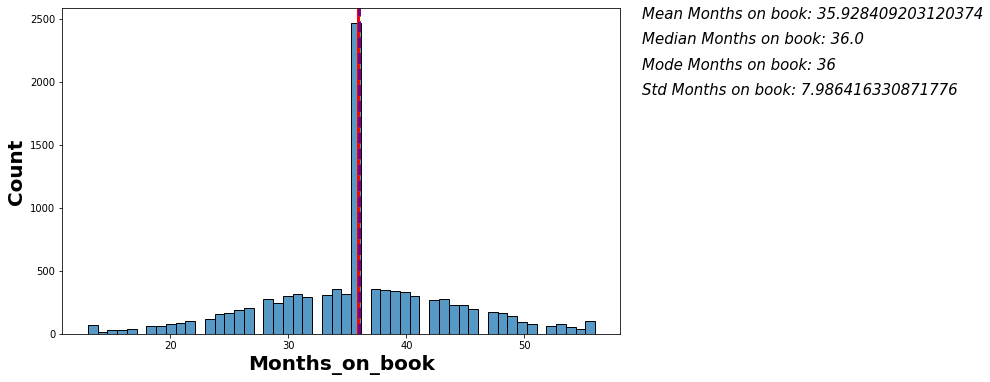

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Months_on_book',ax=ax)
plt.xlabel('Months_on_book', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(60, 1900, "Std Months on book: " + str(data['Months_on_book'].std()), 
        style = 'italic', fontsize=15)
mode = data['Months_on_book'].mode()
plt.text(60, 2100, "Mode Months on book: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(60, 2300, "Median Months on book: " + str(data['Months_on_book'].median()), 
        style = 'italic', fontsize=15)
plt.text(60, 2500, "Mean Months on book: " + str(data['Months_on_book'].mean()), 
        style = 'italic', fontsize=15)

average = data['Months_on_book'].mean()
median = data['Months_on_book'].median()
mode = data['Months_on_book'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

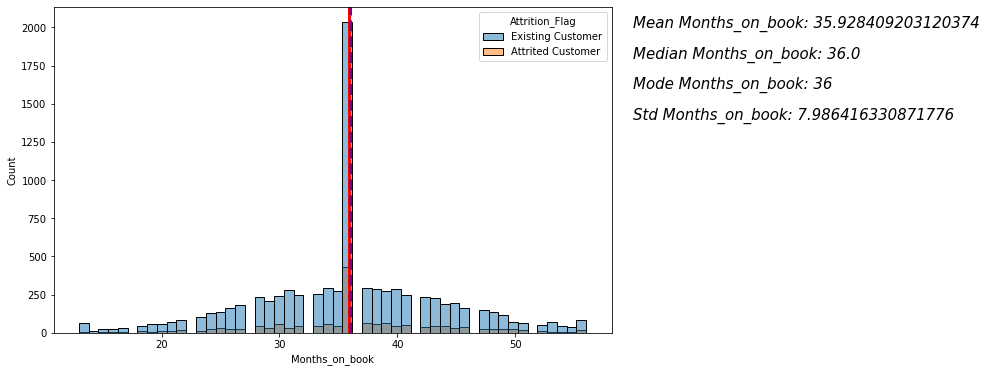

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Months_on_book', hue='Attrition_Flag', ax=ax)

plt.text(60, 1400, "Std Months_on_book: " + str(data['Months_on_book'].std()), 
        style = 'italic', fontsize=15)
mode = data['Months_on_book'].mode()
plt.text(60, 1600, "Mode Months_on_book: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(60, 1800, "Median Months_on_book: " + str(data['Months_on_book'].median()), 
        style = 'italic', fontsize=15)
plt.text(60, 2000, "Mean Months_on_book: " + str(data['Months_on_book'].mean()), 
        style = 'italic', fontsize=15)

average = data['Months_on_book'].mean()
median = data['Months_on_book'].median()
mode = data['Months_on_book'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Credit Limit

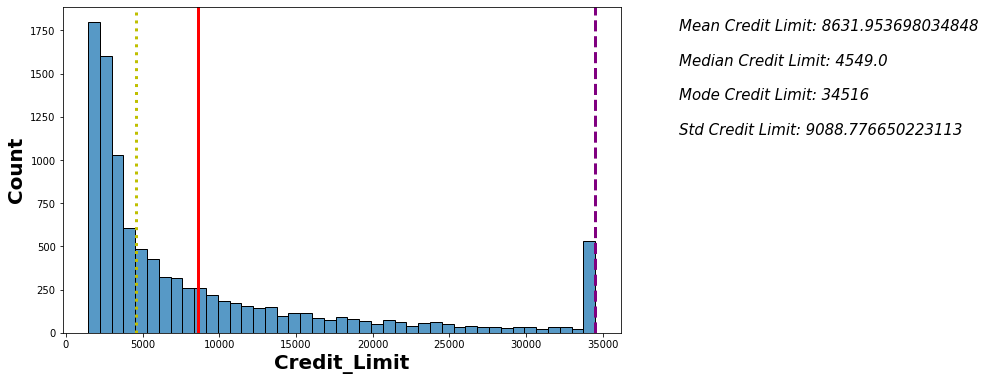

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Credit_Limit', ax=ax)
plt.xlabel('Credit_Limit', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(40000, 1150, "Std Credit Limit: " + str(data['Credit_Limit'].std()), 
        style = 'italic', fontsize=15)
mode = data['Credit_Limit'].mode()
plt.text(40000, 1350, "Mode Credit Limit: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(40000, 1550, "Median Credit Limit: " + str(data['Credit_Limit'].median()), 
        style = 'italic', fontsize=15)
plt.text(40000, 1750, "Mean Credit Limit: " + str(data['Credit_Limit'].mean()), 
        style = 'italic', fontsize=15)

average = data['Credit_Limit'].mean()
median = data['Credit_Limit'].median()
mode = data['Credit_Limit'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

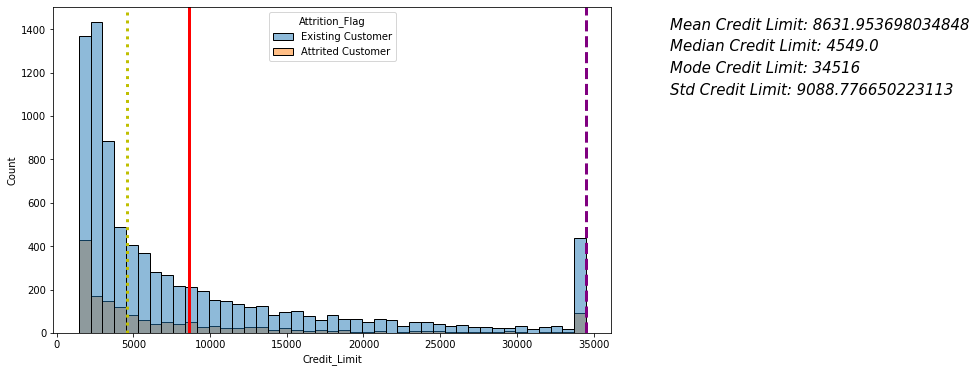

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Credit_Limit', hue='Attrition_Flag',ax=ax)

plt.text(40000, 1100, "Std Credit Limit: " + str(data['Credit_Limit'].std()), 
        style = 'italic', fontsize=15)
mode = data['Credit_Limit'].mode()
plt.text(40000, 1200, "Mode Credit Limit: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(40000, 1300, "Median Credit Limit: " + str(data['Credit_Limit'].median()), 
        style = 'italic', fontsize=15)
plt.text(40000, 1400, "Mean Credit Limit: " + str(data['Credit_Limit'].mean()), 
        style = 'italic', fontsize=15)

average = data['Credit_Limit'].mean()
median = data['Credit_Limit'].median()
mode = data['Credit_Limit'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Total Revolving Balance

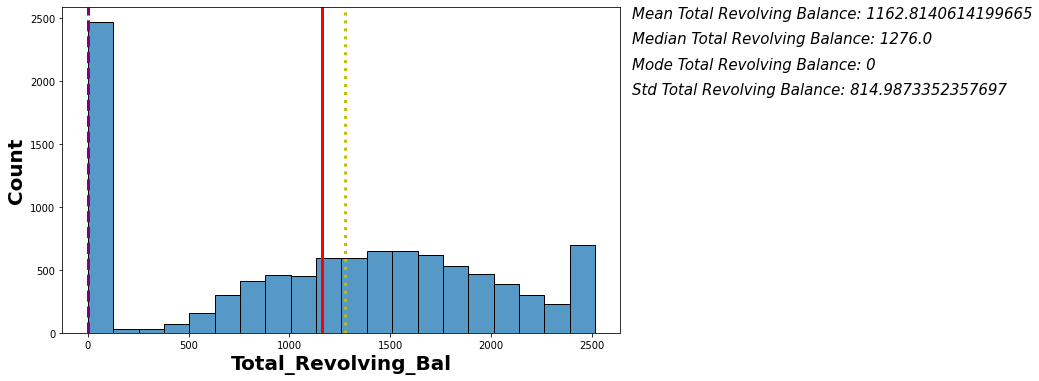

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Revolving_Bal', ax=ax)
plt.xlabel('Total_Revolving_Bal', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(2700, 1900, "Std Total Revolving Balance: " + str(data['Total_Revolving_Bal'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Revolving_Bal'].mode()
plt.text(2700, 2100, "Mode Total Revolving Balance: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(2700, 2300, "Median Total Revolving Balance: " + str(data['Total_Revolving_Bal'].median()), 
        style = 'italic', fontsize=15)
plt.text(2700, 2500, "Mean Total Revolving Balance: " + str(data['Total_Revolving_Bal'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Revolving_Bal'].mean()
median = data['Total_Revolving_Bal'].median()
mode = data['Total_Revolving_Bal'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

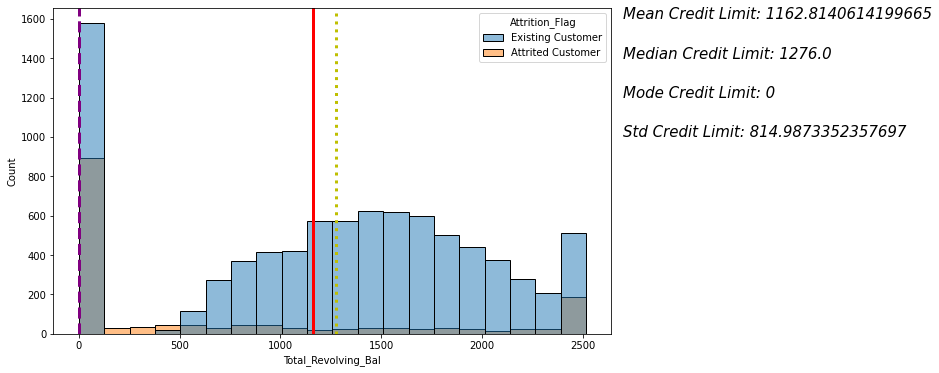

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Revolving_Bal', hue='Attrition_Flag', ax=ax)

plt.text(2700, 1000, "Std Credit Limit: " + str(data['Total_Revolving_Bal'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Revolving_Bal'].mode()
plt.text(2700, 1200, "Mode Credit Limit: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(2700, 1400, "Median Credit Limit: " + str(data['Total_Revolving_Bal'].median()), 
        style = 'italic', fontsize=15)
plt.text(2700, 1600, "Mean Credit Limit: " + str(data['Total_Revolving_Bal'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Revolving_Bal'].mean()
median = data['Total_Revolving_Bal'].median()
mode = data['Total_Revolving_Bal'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Average open to buy

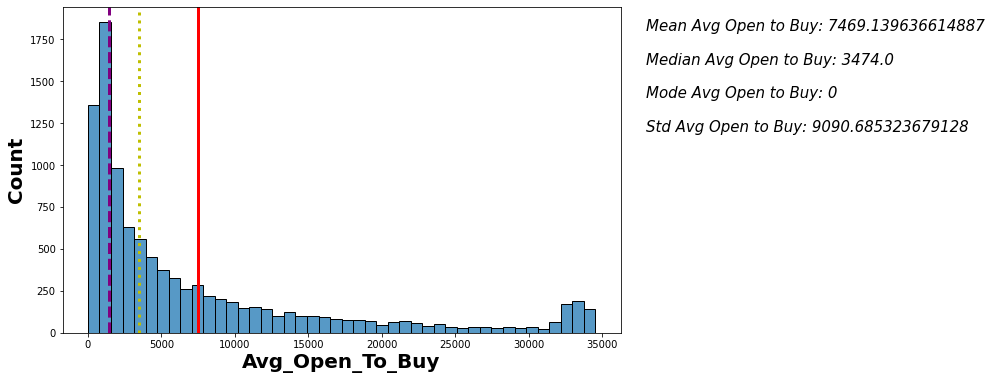

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Avg_Open_To_Buy', ax=ax)
plt.xlabel('Avg_Open_To_Buy', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)


plt.text(38000, 1200, "Std Avg Open to Buy: " + str(data['Avg_Open_To_Buy'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Revolving_Bal'].mode()
plt.text(38000, 1400, "Mode Avg Open to Buy: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(38000, 1600, "Median Avg Open to Buy: " + str(data['Avg_Open_To_Buy'].median()), 
        style = 'italic', fontsize=15)
plt.text(38000, 1800, "Mean Avg Open to Buy: " + str(data['Avg_Open_To_Buy'].mean()), 
        style = 'italic', fontsize=15)

average = data['Avg_Open_To_Buy'].mean()
median = data['Avg_Open_To_Buy'].median()
mode = data['Avg_Open_To_Buy'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

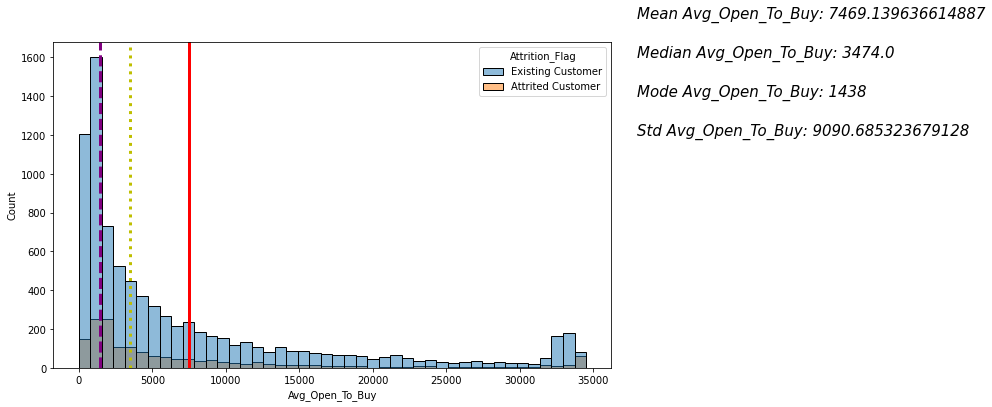

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Avg_Open_To_Buy', hue='Attrition_Flag', ax=ax)

plt.text(38000, 1200, "Std Avg_Open_To_Buy: " + str(data['Avg_Open_To_Buy'].std()), 
        style = 'italic', fontsize=15)
mode = data['Avg_Open_To_Buy'].mode()
plt.text(38000, 1400, "Mode Avg_Open_To_Buy: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(38000, 1600, "Median Avg_Open_To_Buy: " + str(data['Avg_Open_To_Buy'].median()), 
        style = 'italic', fontsize=15)
plt.text(38000, 1800, "Mean Avg_Open_To_Buy: " + str(data['Avg_Open_To_Buy'].mean()), 
        style = 'italic', fontsize=15)

average = data['Avg_Open_To_Buy'].mean()
median = data['Avg_Open_To_Buy'].median()
mode = data['Avg_Open_To_Buy'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Total Amount Change Q4 over Q1

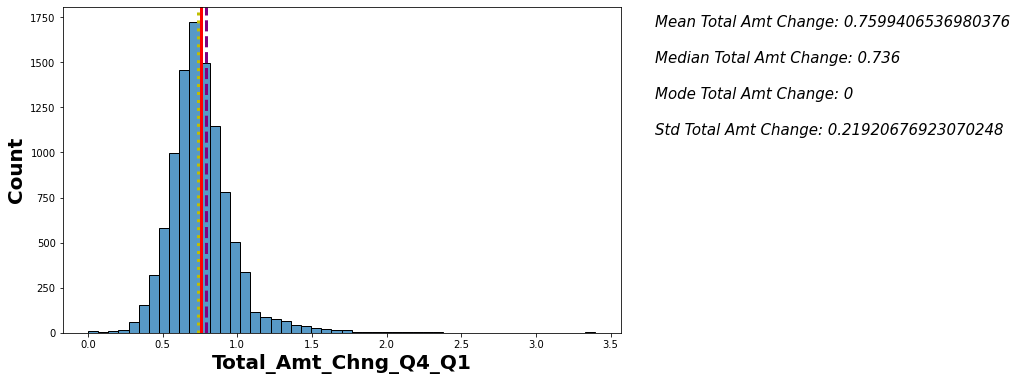

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Amt_Chng_Q4_Q1', bins=50, ax=ax)
plt.xlabel('Total_Amt_Chng_Q4_Q1', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(3.8, 1100, "Std Total Amt Change: " + str(data['Total_Amt_Chng_Q4_Q1'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Amt_Chng_Q4_Q1'].mode()
plt.text(3.8, 1300, "Mode Total Amt Change: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(3.8, 1500, "Median Total Amt Change: " + str(data['Total_Amt_Chng_Q4_Q1'].median()), 
        style = 'italic', fontsize=15)
plt.text(3.8, 1700, "Mean Total Amt Change: " + str(data['Total_Amt_Chng_Q4_Q1'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Amt_Chng_Q4_Q1'].mean()
median = data['Total_Amt_Chng_Q4_Q1'].median()
mode = data['Total_Amt_Chng_Q4_Q1'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

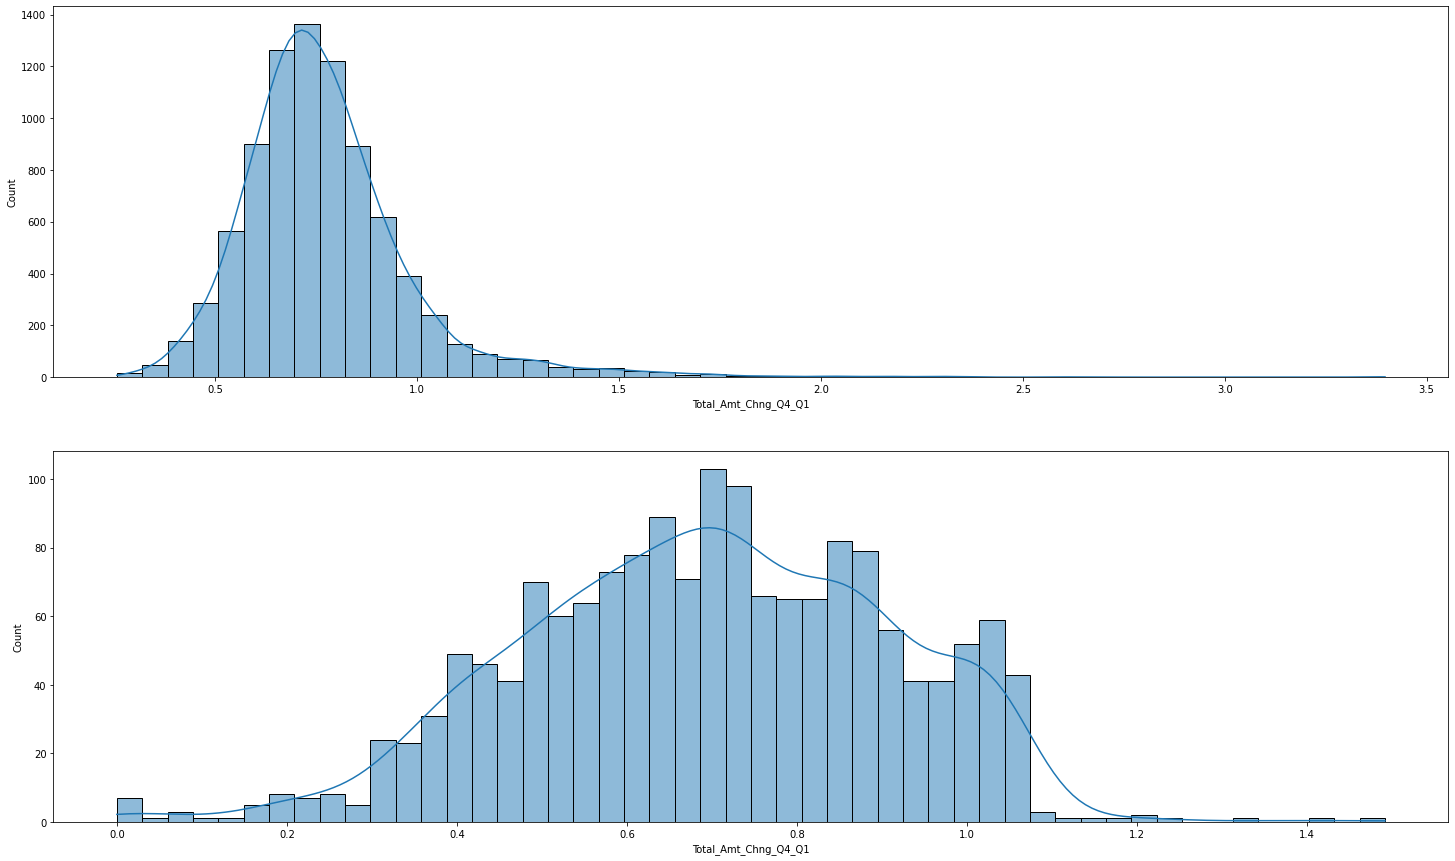

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,15))
sns.histplot(data=existing_data, x='Total_Amt_Chng_Q4_Q1', kde=True, bins=50, ax=axes[0])
sns.histplot(data=attrited_data, x='Total_Amt_Chng_Q4_Q1', kde=True,bins=50 , ax=axes[1])
plt.show()

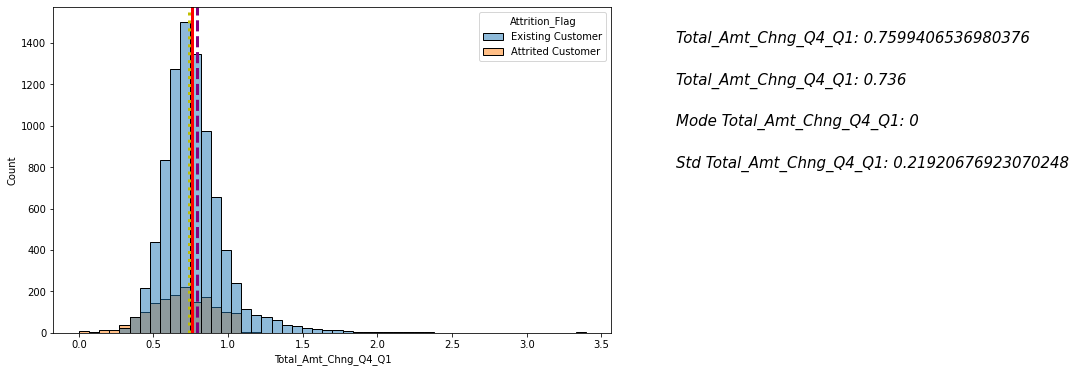

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', bins=50, ax=ax)

plt.text(4, 800, "Std Total_Amt_Chng_Q4_Q1: " + str(data['Total_Amt_Chng_Q4_Q1'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Amt_Chng_Q4_Q1'].mode()
plt.text(4, 1000, "Mode Total_Amt_Chng_Q4_Q1: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(4, 1200, "Total_Amt_Chng_Q4_Q1: " + str(data['Total_Amt_Chng_Q4_Q1'].median()), 
        style = 'italic', fontsize=15)
plt.text(4, 1400, "Total_Amt_Chng_Q4_Q1: " + str(data['Total_Amt_Chng_Q4_Q1'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Amt_Chng_Q4_Q1'].mean()
median = data['Total_Amt_Chng_Q4_Q1'].median()
mode = data['Total_Amt_Chng_Q4_Q1'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Total Transaction Amount

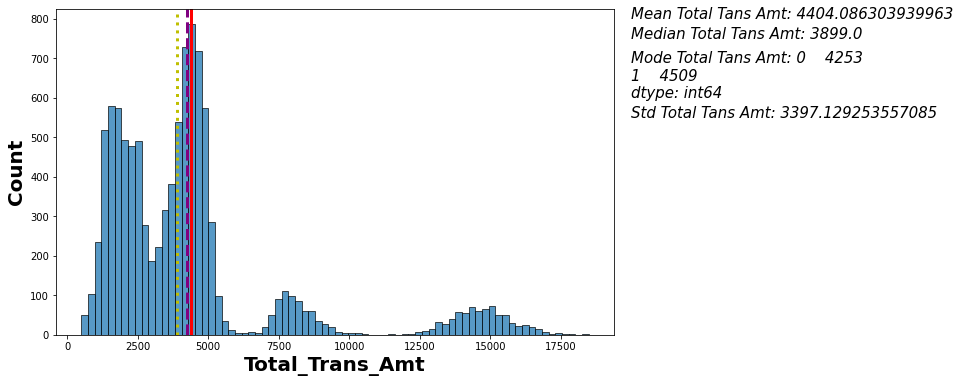

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Trans_Amt', ax=ax)
plt.xlabel('Total_Trans_Amt', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(20000, 550, "Std Total Tans Amt: " + str(data['Total_Trans_Amt'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Trans_Amt'].mode()
plt.text(20000, 600, "Mode Total Tans Amt: " + str((mode)), 
        style = 'italic', fontsize=15)
plt.text(20000, 750, "Median Total Tans Amt: " + str(data['Total_Trans_Amt'].median()), 
        style = 'italic', fontsize=15)
plt.text(20000, 800, "Mean Total Tans Amt: " + str(data['Total_Trans_Amt'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Trans_Amt'].mean()
median = data['Total_Trans_Amt'].median()
mode = data['Total_Trans_Amt'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Total Transaction Count

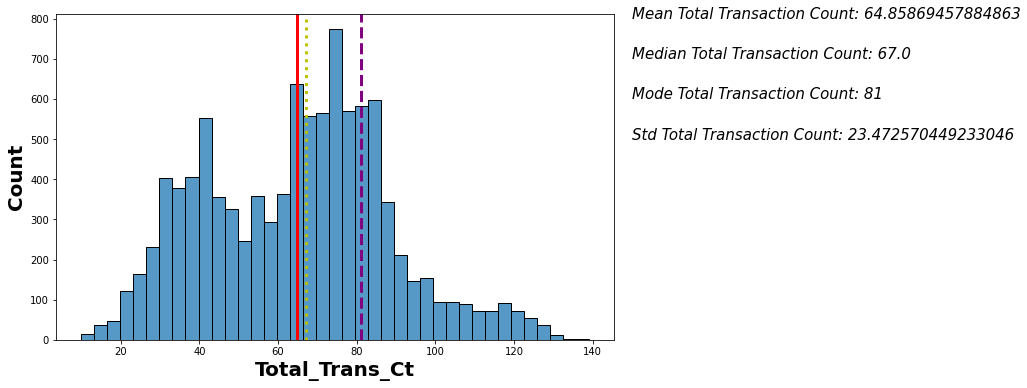

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Trans_Ct', ax=ax)
plt.xlabel('Total_Trans_Ct', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(150, 500, "Std Total Transaction Count: " + str(data['Total_Trans_Ct'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Trans_Ct'].mode()
plt.text(150, 600, "Mode Total Transaction Count: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(150, 700, "Median Total Transaction Count: " + str(data['Total_Trans_Ct'].median()), 
        style = 'italic', fontsize=15)
plt.text(150, 800, "Mean Total Transaction Count: " + str(data['Total_Trans_Ct'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Trans_Ct'].mean()
median = data['Total_Trans_Ct'].median()
mode = data['Total_Trans_Ct'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Total Change in Transaction Count (Q4 over Q1)

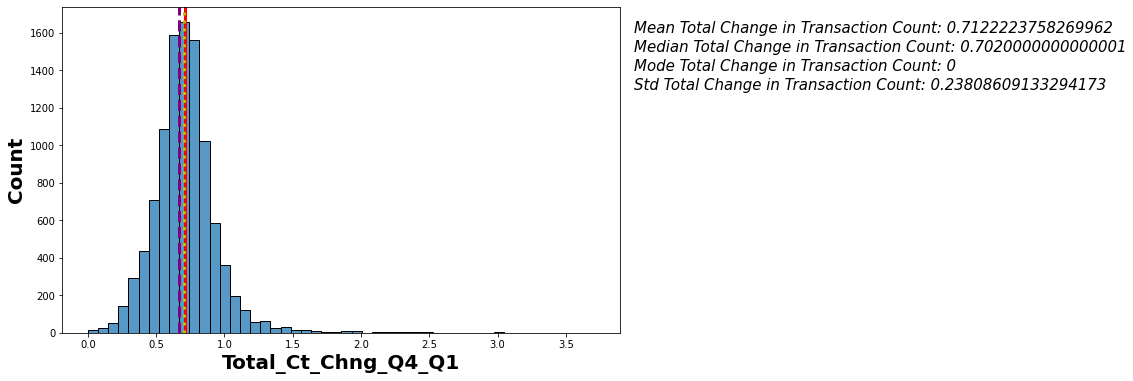

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Ct_Chng_Q4_Q1',bins=50, ax=ax)
plt.xlabel('Total_Ct_Chng_Q4_Q1', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(4, 1300, "Std Total Change in Transaction Count: " + str(data['Total_Ct_Chng_Q4_Q1'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Ct_Chng_Q4_Q1'].mode()
plt.text(4, 1400, "Mode Total Change in Transaction Count: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(4, 1500, "Median Total Change in Transaction Count: " + str(data['Total_Ct_Chng_Q4_Q1'].median()), 
        style = 'italic', fontsize=15)
plt.text(4, 1600, "Mean Total Change in Transaction Count: " + str(data['Total_Ct_Chng_Q4_Q1'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Ct_Chng_Q4_Q1'].mean()
median = data['Total_Ct_Chng_Q4_Q1'].median()
mode = data['Total_Ct_Chng_Q4_Q1'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Average Utilization Ratio

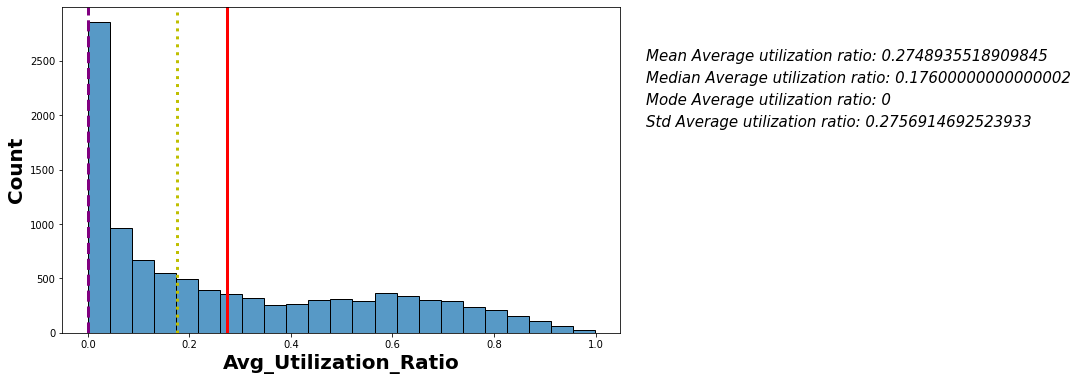

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Avg_Utilization_Ratio', ax=ax)
plt.xlabel('Avg_Utilization_Ratio', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(1.1, 1900, "Std Average utilization ratio: " + str(data['Avg_Utilization_Ratio'].std()), 
        style = 'italic', fontsize=15)
mode = data['Avg_Utilization_Ratio'].mode()
plt.text(1.1, 2100, "Mode Average utilization ratio: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(1.1, 2300, "Median Average utilization ratio: " + str(data['Avg_Utilization_Ratio'].median()), 
        style = 'italic', fontsize=15)
plt.text(1.1, 2500, "Mean Average utilization ratio: " + str(data['Avg_Utilization_Ratio'].mean()), 
        style = 'italic', fontsize=15)

average = data['Avg_Utilization_Ratio'].mean()
median = data['Avg_Utilization_Ratio'].median()
mode = data['Avg_Utilization_Ratio'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

## 3. Categorical : Proportion
Conclusion : 
Kemungkinan variabel yang punya pengaruh pada attrition customer:
1. Contacts count 12 month
2. Months inactive 12 month

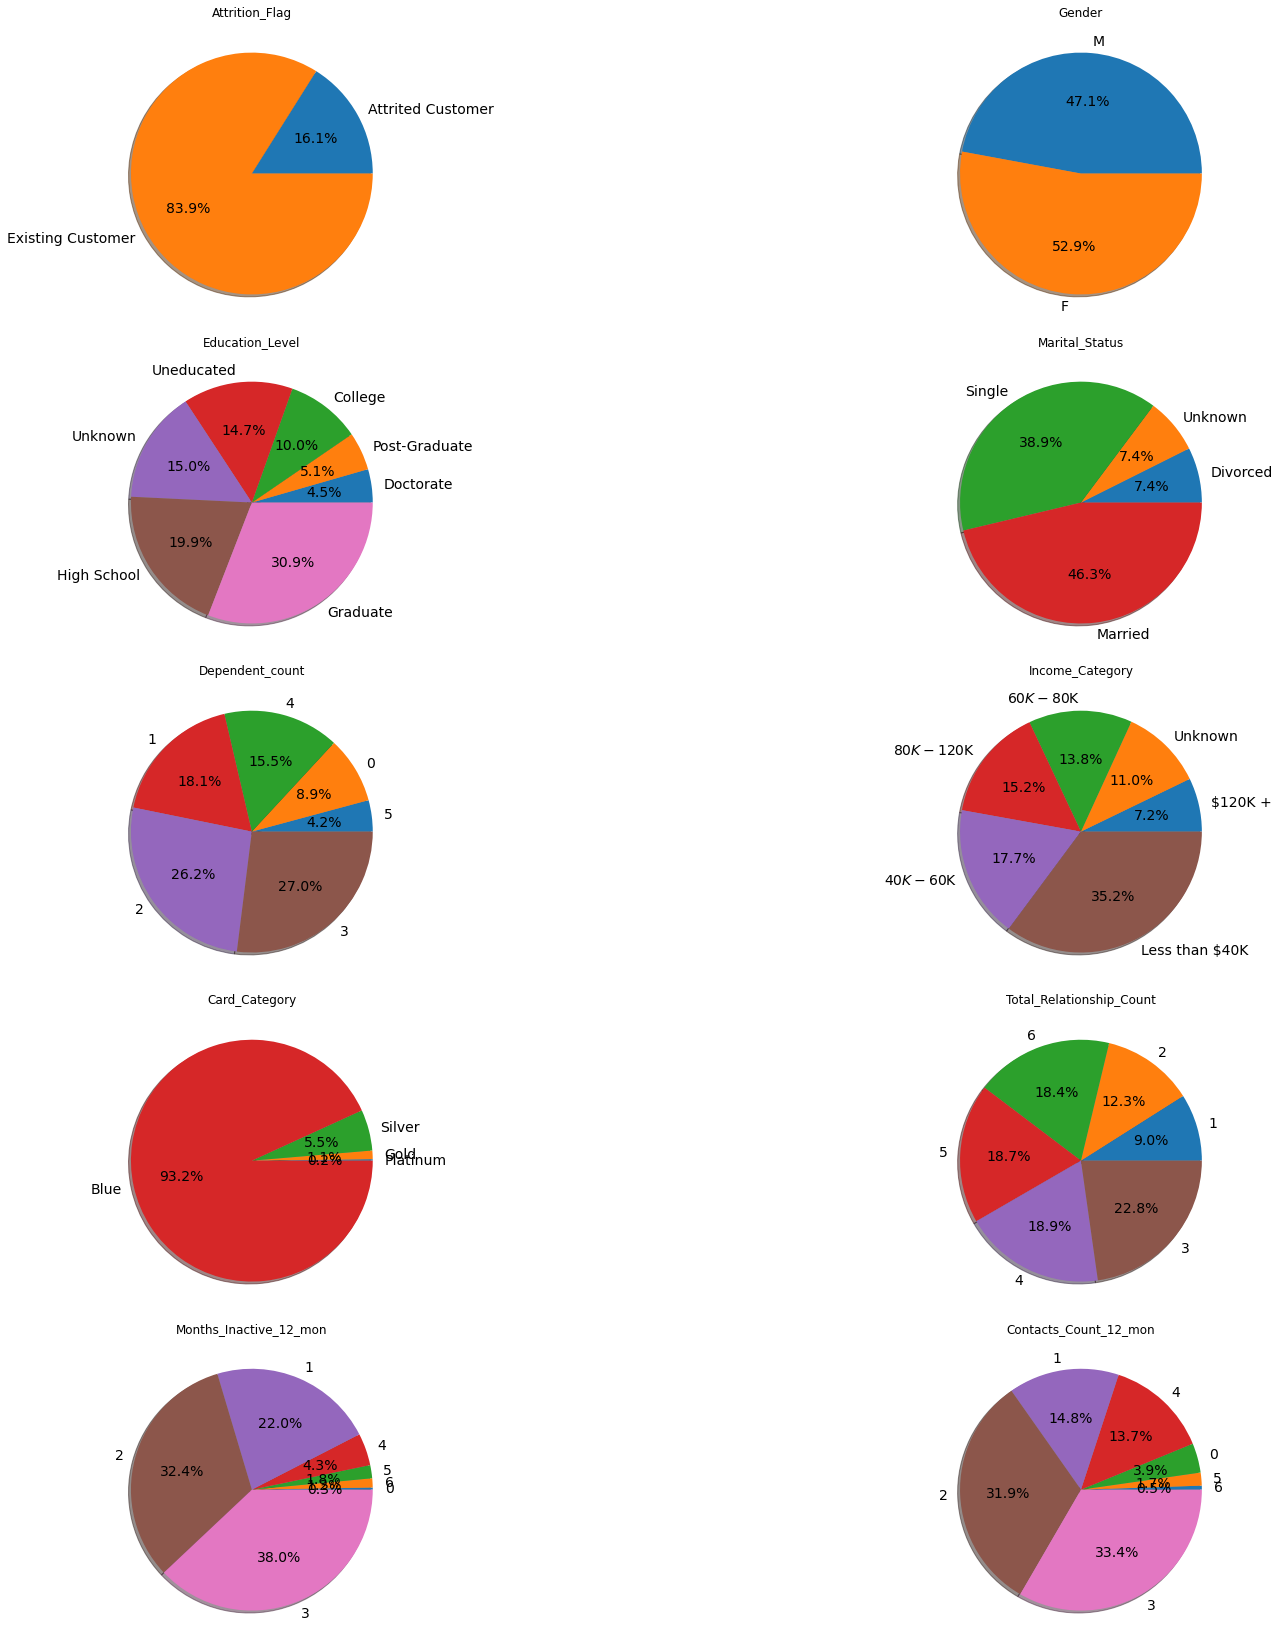

In [ ]:
cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Dependent_count','Income_Category', 'Card_Category', 'Total_Relationship_Count',
            'Months_Inactive_12_mon','Contacts_Count_12_mon']

fig, axes = plt.subplots(5,2, figsize=(29,23))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(cat_cols):
  _ = data[col].value_counts()[::-1].plot(kind='pie',ax=axes[i], title=col, autopct='%1.1f%%', shadow=True, fontsize=14)
  _ = axes[i].set_ylabel('')

_ = plt.tight_layout()

### Attrition Flag

In [ ]:
# Proportion of Attrition Flag
proportion = pd.DataFrame(data['Attrition_Flag'].value_counts())
proportion = proportion.rename(columns={'Attrition_Flag':'Amount'})
proportion['Proportion(%)'] = data['Attrition_Flag'].value_counts(normalize=True)
proportion = proportion.rename_axis('Attrition Flag').reset_index()

# show the five first rows
proportion.head()

,Attrition Flag,Amount,Proportion(%)
0,Existing Customer,8500,0.83934
1,Attrited Customer,1627,0.16066


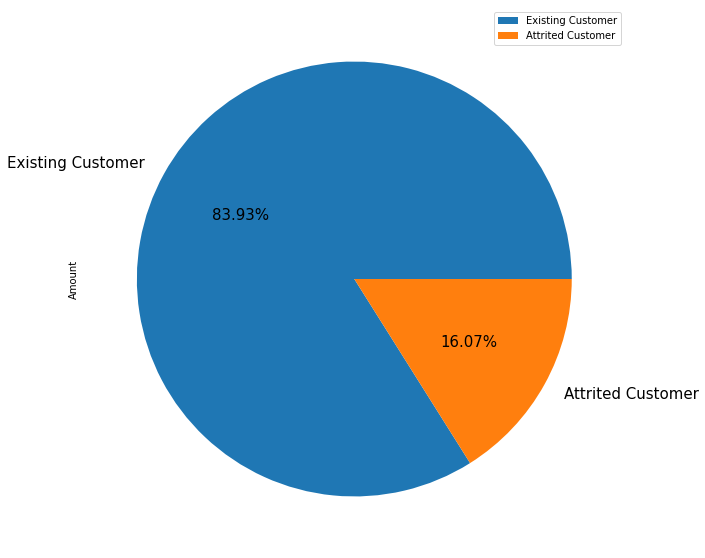

In [ ]:
attrition = pd.DataFrame(data['Attrition_Flag'].value_counts())
attrition = attrition.rename(columns={'Attrition_Flag':'Amount'})
attrition['Proportion']=data['Attrition_Flag'].value_counts(normalize=True)
attrition['Amount'].plot(kind='pie',figsize=(15,10), autopct='%1.2f%%', fontsize=15)

plt.legend(['Existing Customer', 'Attrited Customer'])
plt.show()

### Gender

In [ ]:
# Proportion of Gender
proportion = pd.DataFrame(data['Gender'].value_counts())
proportion = proportion.rename(columns={'Gender':'Amount'})
proportion['Proportion(%)'] = data['Gender'].value_counts(normalize=True)
proportion = proportion.rename_axis('Gender').reset_index()

# show the five first rows
proportion.head()

,Gender,Amount,Proportion(%)
0,F,5358,0.529081
1,M,4769,0.470919


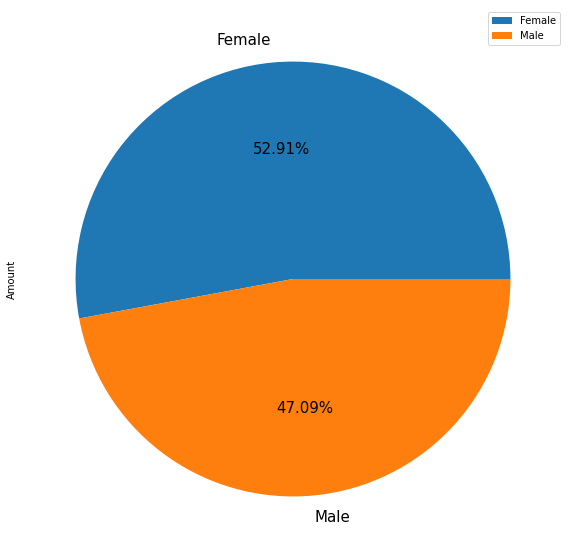

In [ ]:
gender = pd.DataFrame(data['Gender'].value_counts())
gender = gender.rename(columns={'Gender':'Amount'})
gender = gender.rename(index={'F': 'Female', 'M':'Male'})
gender['Proportion']=data['Gender'].value_counts(normalize=True)
gender['Amount'].plot(kind='pie',figsize=(15,10), autopct='%1.2f%%', fontsize=15)

plt.legend(['Female', 'Male'])
plt.show()

,Existing Customer by Gender
F,4428
M,4072


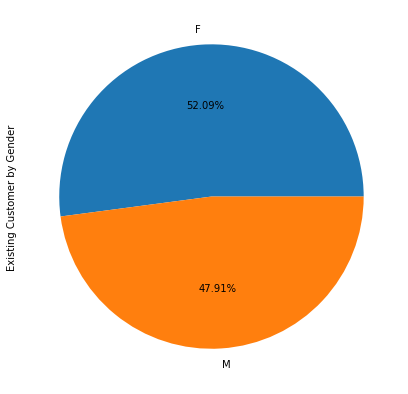

In [ ]:
# Existing Customer from Gender Variable
Existing_gender = pd.DataFrame(existing_data['Gender'].value_counts())
df_new = Existing_gender.rename(columns={'Gender': 'Existing Customer by Gender'})
display(df_new)

df_new['Existing Customer by Gender'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

,Attrition Customer by Gender
F,930
M,697


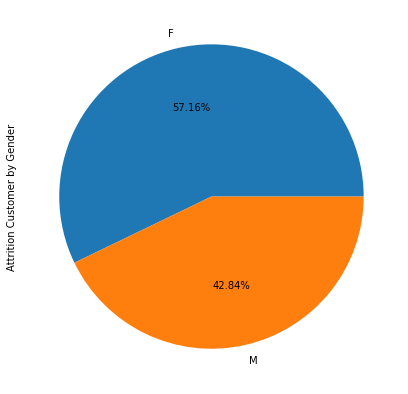

In [ ]:
# Attrited Customer from Gender Variable
attrited_gender = pd.DataFrame(attrited_data['Gender'].value_counts())
df_new = attrited_gender.rename(columns={'Gender': 'Attrition Customer by Gender'})
display(df_new)

df_new['Attrition Customer by Gender'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

### Educational Level



In [ ]:
# Proportion of Educational Level
proportion = pd.DataFrame(data['Education_Level'].value_counts())
proportion = proportion.rename(columns={'Education_Level':'Amount'})
proportion['Proportion(%)'] = data['Education_Level'].value_counts(normalize=True)
proportion = proportion.rename_axis('Education Level').reset_index()

# show the five first rows
proportion.head()

,Education Level,Amount,Proportion(%)
0,Graduate,3128,0.308877
1,High School,2013,0.198776
2,Unknown,1519,0.149995
3,Uneducated,1487,0.146835
4,College,1013,0.100030


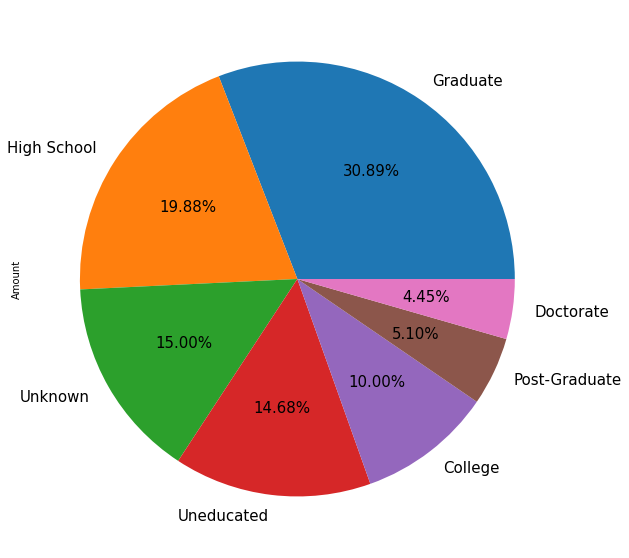

In [ ]:
gender = pd.DataFrame(data['Education_Level'].value_counts())
gender = gender.rename(columns={'Education_Level':'Amount'})
gender['Proportion']=data['Education_Level'].value_counts(normalize=True)
gender['Amount'].plot(kind='pie',figsize=(15,10), autopct='%1.2f%%', fontsize=15)

plt.show()

,Education_Level
Graduate,2641
High School,1707
Unknown,1263
Uneducated,1250
College,859
Post-Graduate,424
Doctorate,356


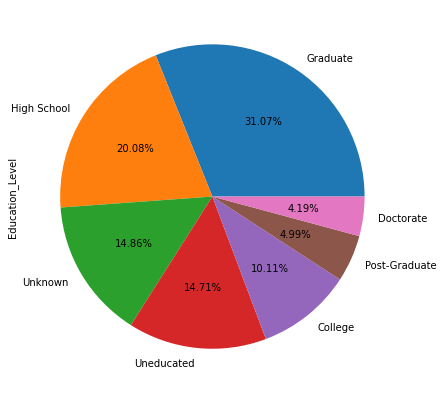

In [ ]:
# Existing Customer from Gender Variable
existing_EL = pd.DataFrame(existing_data['Education_Level'].value_counts())
display(existing_EL)

existing_EL['Education_Level'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

In [ ]:
# Attrited Customer from Gender Variable
attrited_gender = pd.DataFrame(attrited_data['Education_Level'].value_counts())
#df1 = attrited_gender.rename(columns={'Education_Level': 'Attrition Customer by Education_Level'})
df1 = df.reindex(['Graduate','High School','Unknown','Uneducated','College','Post-Graduate','Doctorate'])
display(df1)

df1['Education_Level'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

NameError: ignored

In [ ]:
# Existing customer from IC Variable
existing_EL = pd.DataFrame(existing_data['Education_Level'].value_counts())
display(existing_EL)

df_new = existing_data.rename(columns={'Education_Level': 'Existing Customer by Education Level'})
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
sns.countplot(data=df_new, x='Existing Customer by Education Level')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold')
plt.show()
plt.show()

In [ ]:
# Attrited customer from EL Variable
df_new = attrited_data.rename(columns={'Education_Level': 'Attrited Customer by Education Level'})
fig, ax = plt.subplots(1, 1, figsize=(17, 15))
sns.countplot(data=df_new, x='Attrited Customer by Education Level')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold')
plt.show()

### Marital Status

In [ ]:
# # Proportion of Educational Level
proportion = pd.DataFrame(data['Marital_Status'].value_counts())
proportion = proportion.rename(columns={'Marital_Status':'Amount'})
proportion['Proportion(%)'] = data['Marital_Status'].value_counts(normalize=True)
proportion = proportion.rename_axis('Marital_Status').reset_index()

# show the five first rows
proportion.head()

In [ ]:
marital = pd.DataFrame(data['Marital_Status'].value_counts())
marital = marital.rename(columns={'Marital_Status':'Amount'})
marital['Proportion']=data['Marital_Status'].value_counts(normalize=True)
marital['Amount'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

In [ ]:
# Existing customer from Marital status Variable
Existing_MS = pd.DataFrame(existing_data['Marital_Status'].value_counts())
df1 = Existing_MS.reindex(['Married','Single','Unknown','Divorced'])
display(df1)
#df_new = Existing_MS.rename(columns={'Marital_Status': 'Existing Customer by Marital Status'})

df1['Marital_Status'].plot(kind='pie',figsize=(11,6), autopct='%1.2f%%')
plt.show()

In [ ]:
# Attrited customer from Marital status Variable
Attrited_MS = pd.DataFrame(attrited_data['Marital_Status'].value_counts())
df_new = Attrited_MS.rename(columns={'Marital_Status': 'Attrited Customer by Marital Status'})
display(df_new)

df_new['Attrited Customer by Marital Status'].plot(kind='pie',figsize=(11,6), autopct='%1.2f%%')
plt.show()

### Income Category

In [ ]:
# # Proportion of Income Category
proportion = pd.DataFrame(data['Income_Category'].value_counts())
proportion = proportion.rename(columns={'Income_Category':'Amount'})
proportion['Proportion(%)'] = data['Income_Category'].value_counts(normalize=True)
proportion = proportion.rename_axis('Income_Category').reset_index()

# show the five first rows
proportion.head()

In [ ]:
income = pd.DataFrame(data['Income_Category'].value_counts())
income = income.rename(columns={'Income_Category':'Amount'})
income['Proportion']=data['Income_Category'].value_counts(normalize=True)
income['Amount'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

In [ ]:
# Existing customer from Marital status Variable
Existing_MS = pd.DataFrame(existing_data['Income_Category'].value_counts())
#df1 = Existing_MS.reindex(['Married','Single','Unknown','Divorced'])
display(Existing_MS)
#df_new = Existing_MS.rename(columns={'Marital_Status': 'Existing Customer by Marital Status'})

Existing_MS['Income_Category'].plot(kind='pie',figsize=(11,6), autopct='%1.2f%%')
plt.show()

In [ ]:
# Existing customer from Marital status Variable
Existing_MS = pd.DataFrame(attrited_data['Income_Category'].value_counts())
#df1 = Existing_MS.reindex(['Married','Single','Unknown','Divorced'])
display(Existing_MS)
#df_new = Existing_MS.rename(columns={'Marital_Status': 'Existing Customer by Marital Status'})

Existing_MS['Income_Category'].plot(kind='pie',figsize=(11,6), autopct='%1.2f%%')
plt.show()

In [ ]:
#countplot
fig, ax = plt.subplots(1, 1, figsize=(15, 13))
sns.countplot(data=data, x='Income_Category')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold')
plt.show()

In [ ]:
# Existing customer from IC Variable
df_new = existing_data.rename(columns={'Income_Category': 'Existing Customer by Income Category'})
fig, ax = plt.subplots(1, 1, figsize=(17, 15))
sns.countplot(data=df_new, x='Existing Customer by Income Category')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold')
plt.show()

In [ ]:
# Attrited customer from IC Variable
df_new = attrited_data.rename(columns={'Income_Category': 'Attrited Customer by Income Category'})
fig, ax = plt.subplots(1, 1, figsize=(15, 11))
sns.countplot(data=df_new, x='Attrited Customer by Income Category')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold')
plt.show()

### Card Category

In [ ]:
# Proportion of Card Category
proportion = pd.DataFrame(data['Card_Category'].value_counts())
proportion = proportion.rename(columns={'Card_Category':'Amount'})
proportion['Proportion(%)'] = data['Card_Category'].value_counts(normalize=True)
proportion = proportion.rename_axis('Card Category').reset_index()

# show the five first rows
proportion.head()

In [ ]:
#countplot
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.countplot(data=data, x='Card_Category')
plt.xlabel('Card_Category', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

In [ ]:
# Existing customer from CC Variable
Existing_MS = pd.DataFrame(existing_data['Card_Category'].value_counts())
display(Existing_MS)
df_new = existing_data.rename(columns={'Card_Category': 'Existing Customer by Card Category'})
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(data=df_new, x='Existing Customer by Card Category')
plt.xlabel('Existing Customer by Card Category', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

In [ ]:
# Attrited customer from CC Variable
Existing_MS = pd.DataFrame(attrited_data['Card_Category'].value_counts())
display(Existing_MS)
df_new = attrited_data.rename(columns={'Card_Category': 'Attrited Customer by Card Category'})
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(data=df_new, x='Attrited Customer by Card Category')
plt.xlabel('Attrited Customer by Card Category', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

###Dependent count

In [ ]:
# Proportion of Card Category
proportion = pd.DataFrame(data['Dependent_count'].value_counts())
proportion = proportion.rename(columns={'Dependent_count':'Amount'})
proportion['Proportion(%)'] = data['Dependent_count'].value_counts(normalize=True)
proportion = proportion.rename_axis('Dependent_count').reset_index()

# show the five first rows
display(proportion)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(data=data, x='Dependent_count',)
plt.xlabel('Dependent_count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

In [ ]:
# Existing customer from DC Variable
Existing_MS = pd.DataFrame(existing_data['Dependent_count'].value_counts())
display(Existing_MS)

df_new = existing_data.rename(columns={'Dependent_count': 'Existing Customer by Dependent count'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Existing Customer by Dependent count')
plt.xlabel('Existing Customer by Dependent count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

In [ ]:
# Attrited customer from DC Variable
Existing_MS = pd.DataFrame(attrited_data['Dependent_count'].value_counts())
display(Existing_MS)

df_new = attrited_data.rename(columns={'Dependent_count': 'Attrited Customer by Dependent count'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Attrited Customer by Dependent count')
plt.xlabel('Attrited Customer by Dependent count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

### Total relationship count

In [ ]:
# Proportion of TRC
proportion = pd.DataFrame(data['Total_Relationship_Count'].value_counts())
proportion = proportion.rename(columns={'Total_Relationship_Count':'Amount'})
proportion['Proportion(%)'] = data['Total_Relationship_Count'].value_counts(normalize=True)
proportion = proportion.rename_axis('Total_Relationship_Count').reset_index()

# show the five first rows
display(proportion)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(data=data, x='Total_Relationship_Count',)
plt.xlabel('Total_Relationship_Count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

In [ ]:
# Existing customer from TRC Variable
Existing_MS = pd.DataFrame(existing_data['Total_Relationship_Count'].value_counts())
display(Existing_MS)

df_new = existing_data.rename(columns={'Total_Relationship_Count': 'Existing Customer by Total_Relationship_Count'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Existing Customer by Total_Relationship_Count')
plt.xlabel('Existing Customer by Total_Relationship_Count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

In [ ]:
# Attrited customer from TRC Variable
Existing_MS = pd.DataFrame(attrited_data['Total_Relationship_Count'].value_counts())
display(Existing_MS)

df_new = attrited_data.rename(columns={'Total_Relationship_Count': 'Attrited Customer by Total_Relationship_Count'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Attrited Customer by Total_Relationship_Count')
plt.xlabel('Attrited Customer by Total_Relationship_Count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

### Months inactive 12 month

In [ ]:
# Proportion of Months Inactive
proportion = pd.DataFrame(data['Months_Inactive_12_mon'].value_counts())
proportion = proportion.rename(columns={'Months_Inactive_12_mon':'Amount'})
proportion['Proportion(%)'] = data['Months_Inactive_12_mon'].value_counts(normalize=True)
proportion = proportion.rename_axis('Months_Inactive_12_mon').reset_index()

# show the five first rows
display(proportion)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(data=data, x='Months_Inactive_12_mon',)
plt.xlabel('Months_Inactive_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

In [ ]:
# Existing customer from MI Variable
Existing_MS = pd.DataFrame(existing_data['Months_Inactive_12_mon'].value_counts())
display(Existing_MS)

df_new = existing_data.rename(columns={'Months_Inactive_12_mon': 'Existing Customer by Months_Inactive_12_mon'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Existing Customer by Months_Inactive_12_mon')
plt.xlabel('Existing Customer by Months_Inactive_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)


In [ ]:
# Attrited customer from MI Variable
Existing_MS = pd.DataFrame(attrited_data['Months_Inactive_12_mon'].value_counts())
display(Existing_MS)

df_new = attrited_data.rename(columns={'Total_Relationship_Count': 'Attrited Customer by Months_Inactive_12_mon'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Attrited Customer by Months_Inactive_12_mon')
plt.xlabel('Attrited Customer by Months_Inactive_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

###Contacts count 12 month

In [ ]:
# Proportion of CC12
proportion = pd.DataFrame(data['Contacts_Count_12_mon'].value_counts())
proportion = proportion.rename(columns={'Contacts_Count_12_mon':'Amount'})
proportion['Proportion(%)'] = data['Contacts_Count_12_mon'].value_counts(normalize=True)
proportion = proportion.rename_axis('Contacts_Count_12_mon').reset_index()

# show the five first rows
display(proportion)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(data=data, x='Contacts_Count_12_mon',)
plt.xlabel('Contacts_Count_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

In [ ]:
# Existing customer from CC12 Variable
Existing_MS = pd.DataFrame(existing_data['Contacts_Count_12_mon'].value_counts())
display(Existing_MS)

df_new = existing_data.rename(columns={'Contacts_Count_12_mon': 'Existing Customer by Contacts_Count_12_mon'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Existing Customer by Contacts_Count_12_mon')
plt.xlabel('Existing Customer by Contacts_Count_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

In [ ]:
# Attrited customer from CC12 Variable
Existing_MS = pd.DataFrame(attrited_data['Contacts_Count_12_mon'].value_counts())
display(Existing_MS)

df_new = attrited_data.rename(columns={'Contacts_Count_12_mon': 'Attrited Customer by Contacts_Count_12_mon'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Attrited Customer by Contacts_Count_12_mon')
plt.xlabel('Attrited Customer by Contacts_Count_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

#Separate dataset into two dataset in attrition_flag
* Existing customer
* Attrited customer

In [ ]:
# data.groupby(['Attrition_Flag'], as_index=True)
existing_data = data[(data.Attrition_Flag == 'Existing Customer')]
attrited_data = data[(data.Attrition_Flag == 'Attrited Customer')]
existing_data.head(), attrited_data.head()

#Z Test & T Test Credit Limit & Avg Open To Buy

##Z test

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

#Set Value
confidence_level = 0.95
alpha = 1-confidence_level
data1= data['Credit_Limit'].sample(n=150)
data2=data['Avg_Open_To_Buy'].sample(n=150)
data1_mean = np.mean(data1)
data2_mean = np.mean(data2)
print("Credit Limit mean value:",data1_mean)
print("Avg Open To Buy mean value:",data2_mean)
print('')

data1_std = np.std(data1)
data2_std = np.std(data2)
print("Credit Limit std value:",data1_std)
print("Avg Open To Buy std value:",data2_std)
print('')

#Test
ztest ,pval1 = stests.ztest(x1= data1,
                            x2=data2, 
                            value=0,alternative='two-sided')
if pval1 < 0.05:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pval1, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pval1, alpha))

## T test
H0: The average of credit limit variable is the same with the average of average open to buy variable

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

#Set Value
confidence_level = 0.95
alpha = 1-confidence_level

x1= data['Credit_Limit'].sample(n=150)
x2= data['Avg_Open_To_Buy'].sample(n=150)

x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
print("Credit Limit mean value:",x1_mean)
print("Avg Open To Buy mean value:",x2_mean)
print('')

x1_std = np.std(x1)
x2_std = np.std(x2)
print("Credit Limit std value:",x1_std)
print("Avg Open To Buy std value:",x2_std)
print('')

#Test
ttest,pval = ttest_ind(x1,x2)
print("p-value",pval)
print('')

if pval < 0.05:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pval, alpha))
else :
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pval, alpha))

## Explanation


*   Dalam case ini kami lebih memilih untuk menggunakan z-test, karena jumlah sample yang digunakan >30 dan standar deviasi yang telah diketahui diawal hipotesis. Walaupun secara hasil, baik z-test maupun t-test menunjukan hasil yang kurang lebih sama.

*   Kedua metode hampir selalu menghasilkan kesimpulan yang sama yaitu menerima H0, karena kedua variabel memang memiliki korelasi yang kuat. Data Avg_Open_To_Buy didapatkan dari hasil Pengurangan Credit_Limit dengan Total_Revolving_Bal. Dimana Modus dari data Total_Revolving_Bal kebanyakan bernilai 0, sehingga data Credit_Limit dan Avg_Open_To_Buy akan memiliki nilai yang kebanyakan sama(Alasan mengapa nilai korelasi kedua variabel adalah 1)


#Relationship

In [ ]:
# Correlation with sns heatmap
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, )
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);
plt.show()

In [ ]:
data.columns

Positive Correlation :
1. month on book & customer age
2. avg utilization ratio & total revolving bal
3. total trans ct & total trans amt
4. total ct change q4 q1 & total amt change q4 q1
5. avg open to buy & credit limit

Negative Correlation :
1. total trans amt & total relationship count
2. avg utilization ratio & credit limit
3. avg utilization ratio & avg open to buy

## Boxplot

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=5, figsize=(28,18))

f.suptitle('Boxplot all column Numerical', size=40)
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=data, ax=axes[0,0])
sns.boxplot(x="Attrition_Flag", y="Months_on_book", data=data, ax=axes[0,1])
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=data, ax=axes[0,2])
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=data, ax=axes[0,3])
sns.boxplot(x="Attrition_Flag", y="Avg_Open_To_Buy", data=data, ax=axes[0,4])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=data, ax=axes[1,0])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=data, ax=axes[1,1])
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=data, ax=axes[1,2])
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=data, ax=axes[1,3])
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=data, ax=axes[1,4])
plt.show()

### Outlier Data :
1. Customer Age (Existing Customer)
2. Months on book (Both)
3. Credit Limit (Both)
4. Avg open to buy (Both)
5. Total trans amt (Both)
6. Total trans ct (Both)
7. Total ct change Q4 Q1 (Both)
8. Total amt change Q4 Q1 (Both)
9. Avg utilization ratio (Attrited Customer)

### Variables with no Outlier Data :
1. Total Revolving Balance



##Regplot & Scatter Plot (Based on correlation)

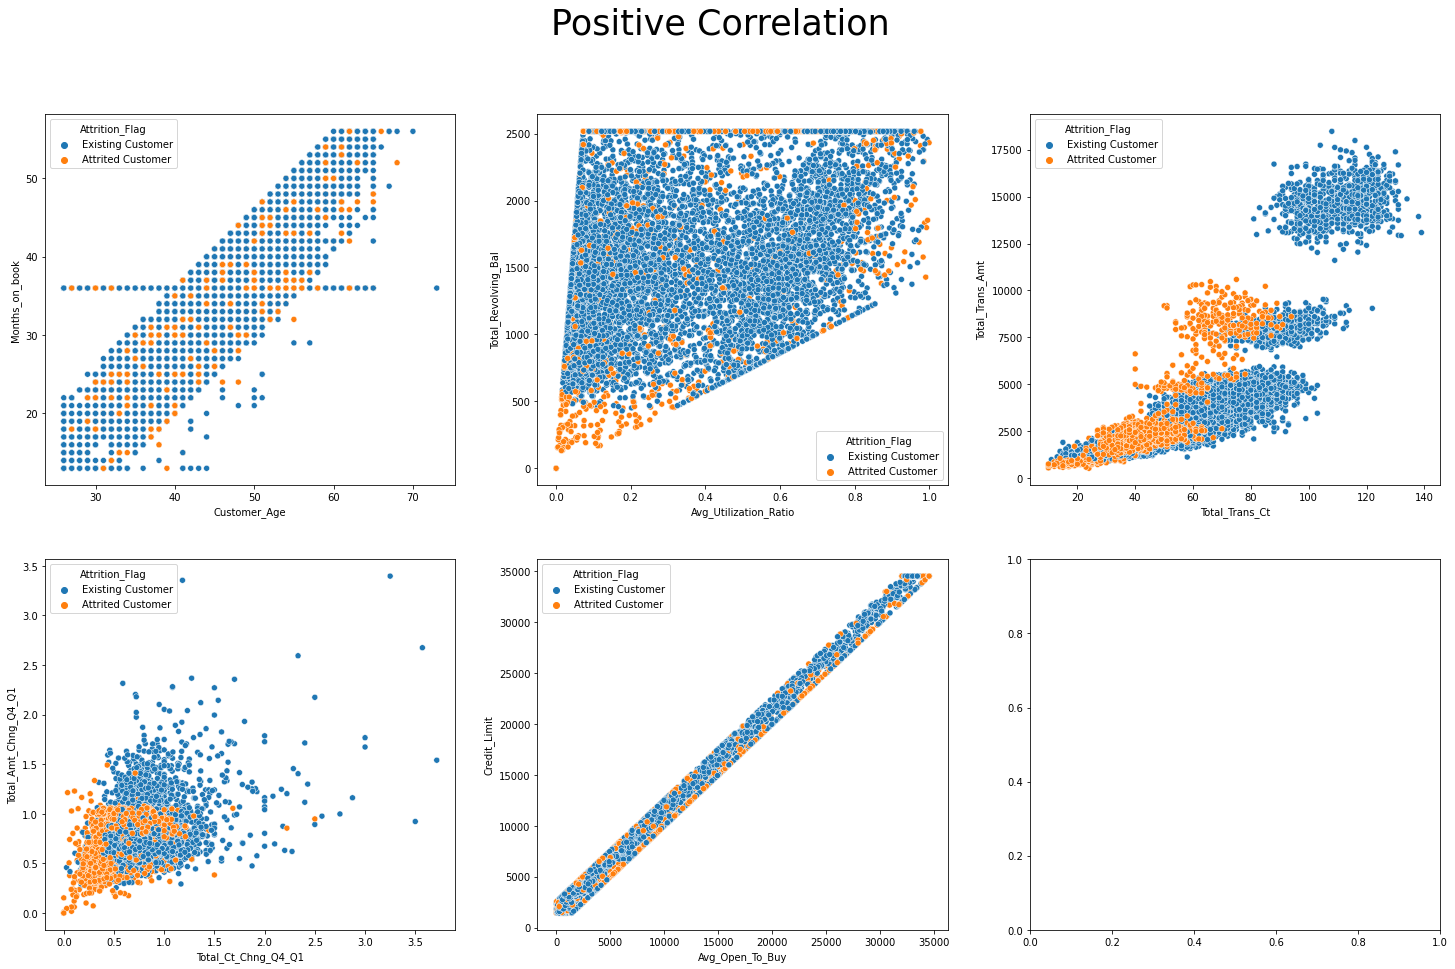

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))
f.suptitle('Positive Correlation', size=35)
sns.scatterplot(x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', data=data, ax=axes[0,0])
sns.scatterplot(x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', hue='Attrition_Flag', data=data, ax=axes[0,1])
sns.scatterplot(x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Attrition_Flag', data=data, ax=axes[0,2])
sns.scatterplot(x='Total_Ct_Chng_Q4_Q1', y='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', data=data, ax=axes[1,0])
sns.scatterplot(x='Avg_Open_To_Buy', y='Credit_Limit', hue='Attrition_Flag', data=data, ax=axes[1,1])

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,15))
f.suptitle('Negative Correlation', size=35)
sns.scatterplot(x='Avg_Utilization_Ratio', y='Credit_Limit', hue='Attrition_Flag', data=data, ax=axes[0])
sns.scatterplot(x='Avg_Open_To_Buy', y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=data, ax=axes[1])

# Data PreProcessing

##Handling Missing Value & Duplicate Data

In [ ]:
# Columns to be dropped
drop_columns = ['CLIENTNUM',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

# Remove CLIENTNUM and the Naive_Bayes_Classifiers
data = data.drop(drop_columns,errors='ignore',axis=1)
# Check for missing or NaN data 
print("No Missing Data in this Dataset")
### checking
data.isna().sum()

No Missing Data in this Dataset


Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
#Checking Duplicate Values
duplicate = data.duplicated().sum()
print(duplicate)
print('Tidak ada data duplicate')

0
Tidak ada data duplicate


In [ ]:
data.info()
print('')
print('Masih ada data categorical yang belum diubah menjadi bentuk numeric')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Encoding Categorical Variables

In [ ]:
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [ ]:
print(x)

       Customer_Age Gender  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0                45      M  ...                1.625                 0.061
1                49      F  ...                3.714                 0.105
2                51      M  ...                2.333                 0.000
3                40      F  ...                2.333                 0.760
4                40      M  ...                2.500                 0.000
...             ...    ...  ...                  ...                   ...
10122            50      M  ...                0.857                 0.462
10123            41      M  ...                0.683                 0.511
10124            44      F  ...                0.818                 0.000
10125            30      M  ...                0.722                 0.000
10126            43      F  ...                0.649                 0.189

[10127 rows x 19 columns]


In [ ]:
print(y)

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object


In [ ]:
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(data=y)
y = df.set_axis(['Attrition_Flag'], axis=1)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Existing Customer',0)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Attrited Customer',1)
display(y)

,Attrition_Flag
0,0
1,0
2,0
3,0
4,0
...,...
10122,0
10123,1
10124,1
10125,1


In [ ]:
#Label Encoder for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

display(x)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


##Splitting Dataset into Training and Test set
##Solve the imbalance dataset

In [ ]:
#Imbalance dataset
data2 = data['Attrition_Flag'].value_counts(normalize=True)
data2

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [ ]:
#Menyeimbangkan Data Variable Target : Attrition Flag
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

x = x.astype(float).values
y = y.astype(float).values

over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=123)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

print('sebelum Smote over sampling')
print(pd.DataFrame(y_train).value_counts())
print('setelah Smote over sampling')
print(pd.DataFrame(y_resampled).value_counts())

sebelum Smote over sampling
0.0    5082
1.0     994
dtype: int64
setelah Smote over sampling
1.0    5082
0.0    5082
dtype: int64


## Visualization after Resampled

##Relationship before sampling

In [ ]:
x_df = pd.DataFrame(x)
x_df = x_df.set_axis(['Customer_Age','Gender', 'Dependent_count','Education_Level','Marital_Status','Income_Catrgory','Card_Category','Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], axis=1, inplace=False)
display(x_df)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Catrgory,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45.0,1.0,3.0,3.0,1.0,2.0,0.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,49.0,0.0,5.0,2.0,2.0,4.0,0.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,51.0,1.0,3.0,2.0,1.0,3.0,0.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,40.0,0.0,4.0,3.0,3.0,4.0,0.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,40.0,1.0,3.0,5.0,1.0,2.0,0.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50.0,1.0,2.0,2.0,2.0,1.0,0.0,40.0,3.0,2.0,3.0,4003.0,1851.0,2152.0,0.703,15476.0,117.0,0.857,0.462
10123,41.0,1.0,2.0,6.0,0.0,1.0,0.0,25.0,4.0,2.0,3.0,4277.0,2186.0,2091.0,0.804,8764.0,69.0,0.683,0.511
10124,44.0,0.0,1.0,3.0,1.0,4.0,0.0,36.0,5.0,3.0,4.0,5409.0,0.0,5409.0,0.819,10291.0,60.0,0.818,0.000
10125,30.0,1.0,2.0,2.0,3.0,1.0,0.0,36.0,4.0,3.0,3.0,5281.0,0.0,5281.0,0.535,8395.0,62.0,0.722,0.000


In [ ]:
x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y)
df = pd.concat([y_df,x_df], axis=1)
df = df.set_axis(['Attrition_Flag','Customer_Age','Gender', 'Dependent_count','Education_Level','Marital_Status','Income_Catrgory','Card_Category','Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], axis=1, inplace=False)
display(df)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Catrgory,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,45.0,1.0,3.0,3.0,1.0,2.0,0.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,0.0,49.0,0.0,5.0,2.0,2.0,4.0,0.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,0.0,51.0,1.0,3.0,2.0,1.0,3.0,0.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,0.0,40.0,0.0,4.0,3.0,3.0,4.0,0.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,0.0,40.0,1.0,3.0,5.0,1.0,2.0,0.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,50.0,1.0,2.0,2.0,2.0,1.0,0.0,40.0,3.0,2.0,3.0,4003.0,1851.0,2152.0,0.703,15476.0,117.0,0.857,0.462
10123,1.0,41.0,1.0,2.0,6.0,0.0,1.0,0.0,25.0,4.0,2.0,3.0,4277.0,2186.0,2091.0,0.804,8764.0,69.0,0.683,0.511
10124,1.0,44.0,0.0,1.0,3.0,1.0,4.0,0.0,36.0,5.0,3.0,4.0,5409.0,0.0,5409.0,0.819,10291.0,60.0,0.818,0.000
10125,1.0,30.0,1.0,2.0,2.0,3.0,1.0,0.0,36.0,4.0,3.0,3.0,5281.0,0.0,5281.0,0.535,8395.0,62.0,0.722,0.000


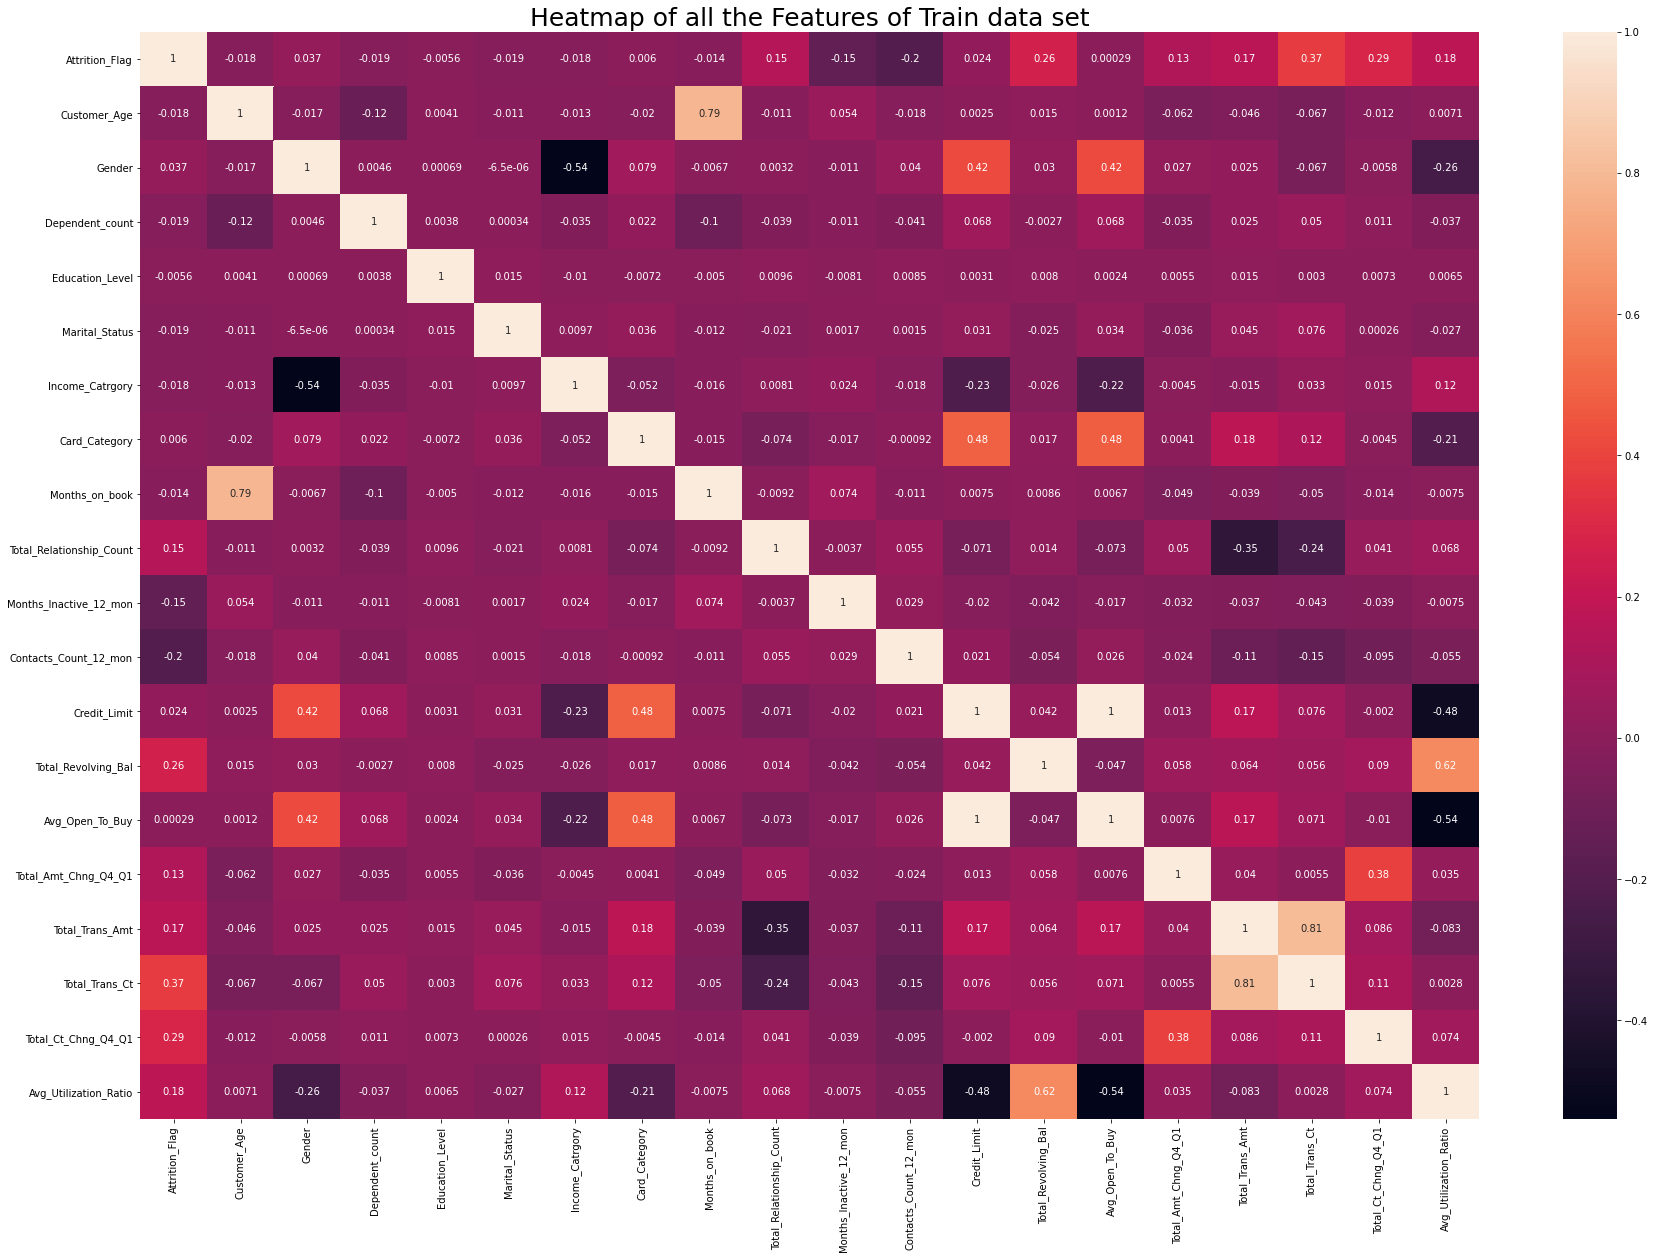

In [ ]:
# Correlation with sns heatmap
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, )
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);
plt.show()

In [ ]:
print("Find most important features relative to Attrition-target")
corr = df.corr()
corr.sort_values(["Attrition_Flag"], ascending = False, inplace = True)
print(corr.Attrition_Flag)

Find most important features relative to Attrition-target
Attrition_Flag              1.000000
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Total_Revolving_Bal         0.263053
Avg_Utilization_Ratio       0.178410
Total_Trans_Amt             0.168598
Total_Relationship_Count    0.150005
Total_Amt_Chng_Q4_Q1        0.131063
Gender                      0.037272
Credit_Limit                0.023873
Card_Category               0.006038
Avg_Open_To_Buy             0.000285
Education_Level            -0.005551
Months_on_book             -0.013687
Income_Catrgory            -0.017584
Customer_Age               -0.018203
Marital_Status             -0.018597
Dependent_count            -0.018991
Months_Inactive_12_mon     -0.152449
Contacts_Count_12_mon      -0.204491
Name: Attrition_Flag, dtype: float64


##Relationship after sampling

In [ ]:
x_df = pd.DataFrame(x_resampled)
y_df = pd.DataFrame(y_resampled)
df = pd.concat([y_df,x_df], axis=1)
df = df.set_axis(['Attrition_Flag','Customer_Age','Gender', 'Dependent_count','Education_Level','Marital_Status','Income_Catrgory','Card_Category','Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], axis=1, inplace=False)
display(df)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Catrgory,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,49.0,0.0,4.0,2.0,0.0,4.0,0.0,43.0,3.0,1.0,4.0,2228.0,1003.0,1225.0,1.119,2104.0,44.0,0.467,0.450
1,0.0,30.0,1.0,0.0,2.0,1.0,1.0,0.0,23.0,6.0,2.0,4.0,4063.0,0.0,4063.0,0.776,7463.0,70.0,0.707,0.000
2,1.0,37.0,1.0,3.0,2.0,1.0,3.0,0.0,20.0,3.0,3.0,3.0,8260.0,2077.0,6183.0,1.167,2323.0,47.0,0.621,0.251
3,1.0,59.0,0.0,0.0,2.0,2.0,4.0,0.0,53.0,6.0,3.0,4.0,4830.0,1469.0,3361.0,0.634,3365.0,63.0,0.750,0.304
4,1.0,32.0,1.0,1.0,1.0,2.0,2.0,0.0,27.0,5.0,3.0,3.0,10029.0,606.0,9423.0,0.727,2192.0,58.0,0.657,0.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10159,0.0,35.0,1.0,2.0,2.0,1.0,3.0,0.0,27.0,3.0,2.0,3.0,12643.0,0.0,12643.0,0.393,787.0,21.0,0.167,0.000
10160,0.0,42.0,1.0,3.0,3.0,1.0,3.0,0.0,36.0,1.0,3.0,2.0,22993.0,0.0,22993.0,1.004,7867.0,75.0,0.786,0.000
10161,0.0,47.0,0.0,3.0,6.0,1.0,4.0,0.0,37.0,1.0,2.0,2.0,1438.3,0.0,1438.3,0.749,2393.0,36.0,0.636,0.000
10162,0.0,42.0,1.0,3.0,0.0,1.0,2.0,0.0,34.0,3.0,3.0,3.0,13450.0,0.0,13450.0,0.742,1000.0,18.0,0.059,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10164 entries, 0 to 10163
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10164 non-null  float64
 1   Customer_Age              10164 non-null  float64
 2   Gender                    10164 non-null  float64
 3   Dependent_count           10164 non-null  float64
 4   Education_Level           10164 non-null  float64
 5   Marital_Status            10164 non-null  float64
 6   Income_Catrgory           10164 non-null  float64
 7   Card_Category             10164 non-null  float64
 8   Months_on_book            10164 non-null  float64
 9   Total_Relationship_Count  10164 non-null  float64
 10  Months_Inactive_12_mon    10164 non-null  float64
 11  Contacts_Count_12_mon     10164 non-null  float64
 12  Credit_Limit              10164 non-null  float64
 13  Total_Revolving_Bal       10164 non-null  float64
 14  Avg_Op

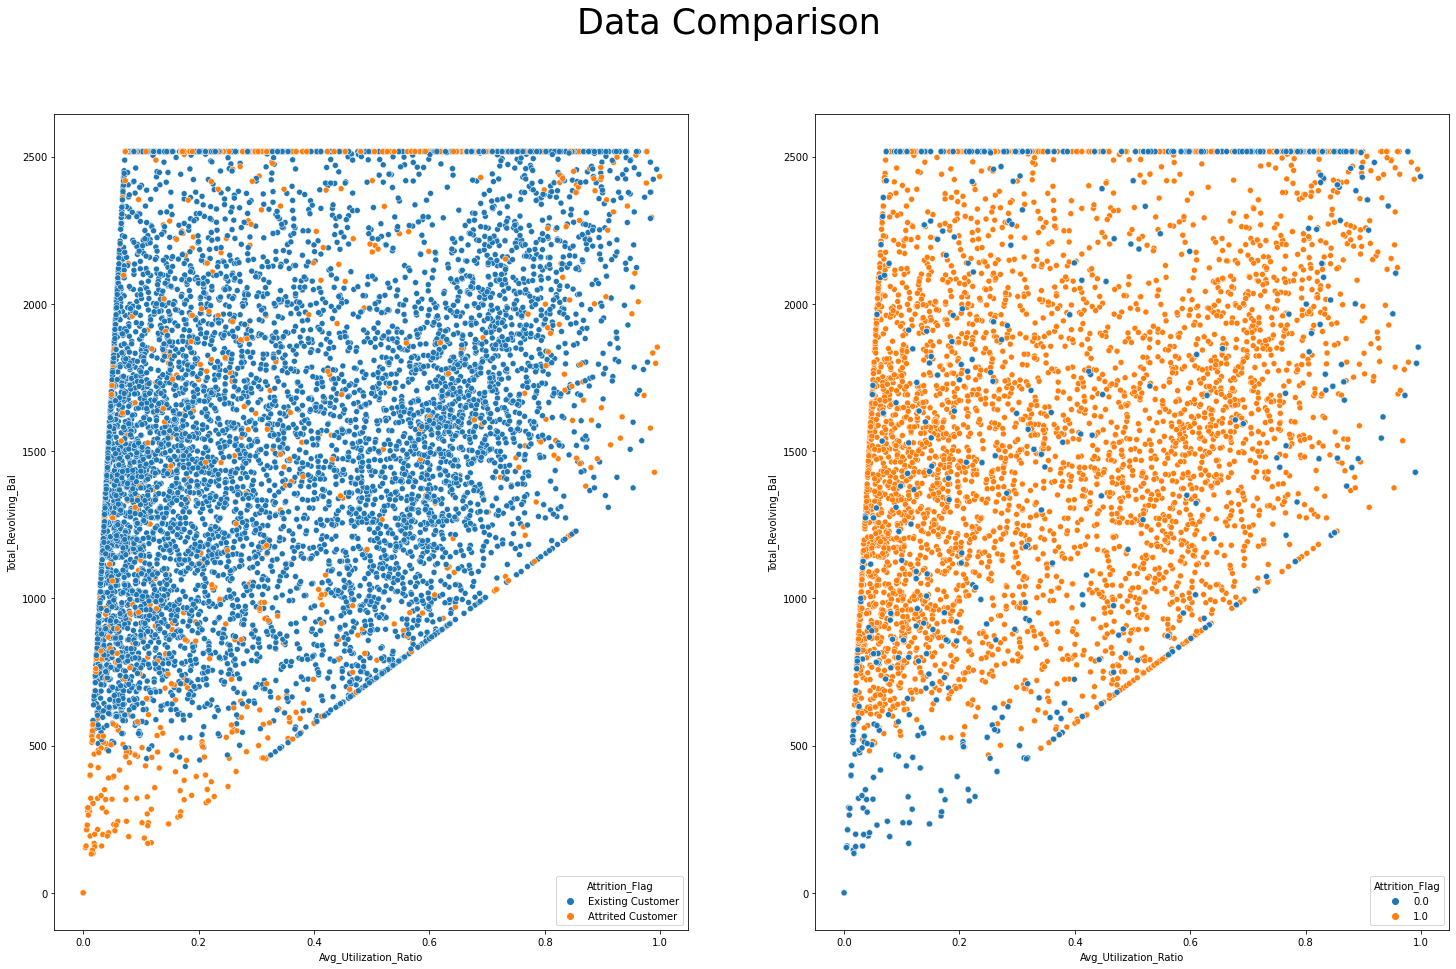

In [ ]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,15))
f.suptitle('Data Comparison', size=35)
#sns.scatterplot(x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', hue='Attrition_Flag', data=data, ax=axes[0])
#sns.scatterplot(x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', hue='Attrition_Flag', data=df, ax=axes[1])
sns.scatterplot(x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', hue='Attrition_Flag', data=data, ax=axes[0])
sns.scatterplot(x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', hue='Attrition_Flag', data=df, ax=axes[1])

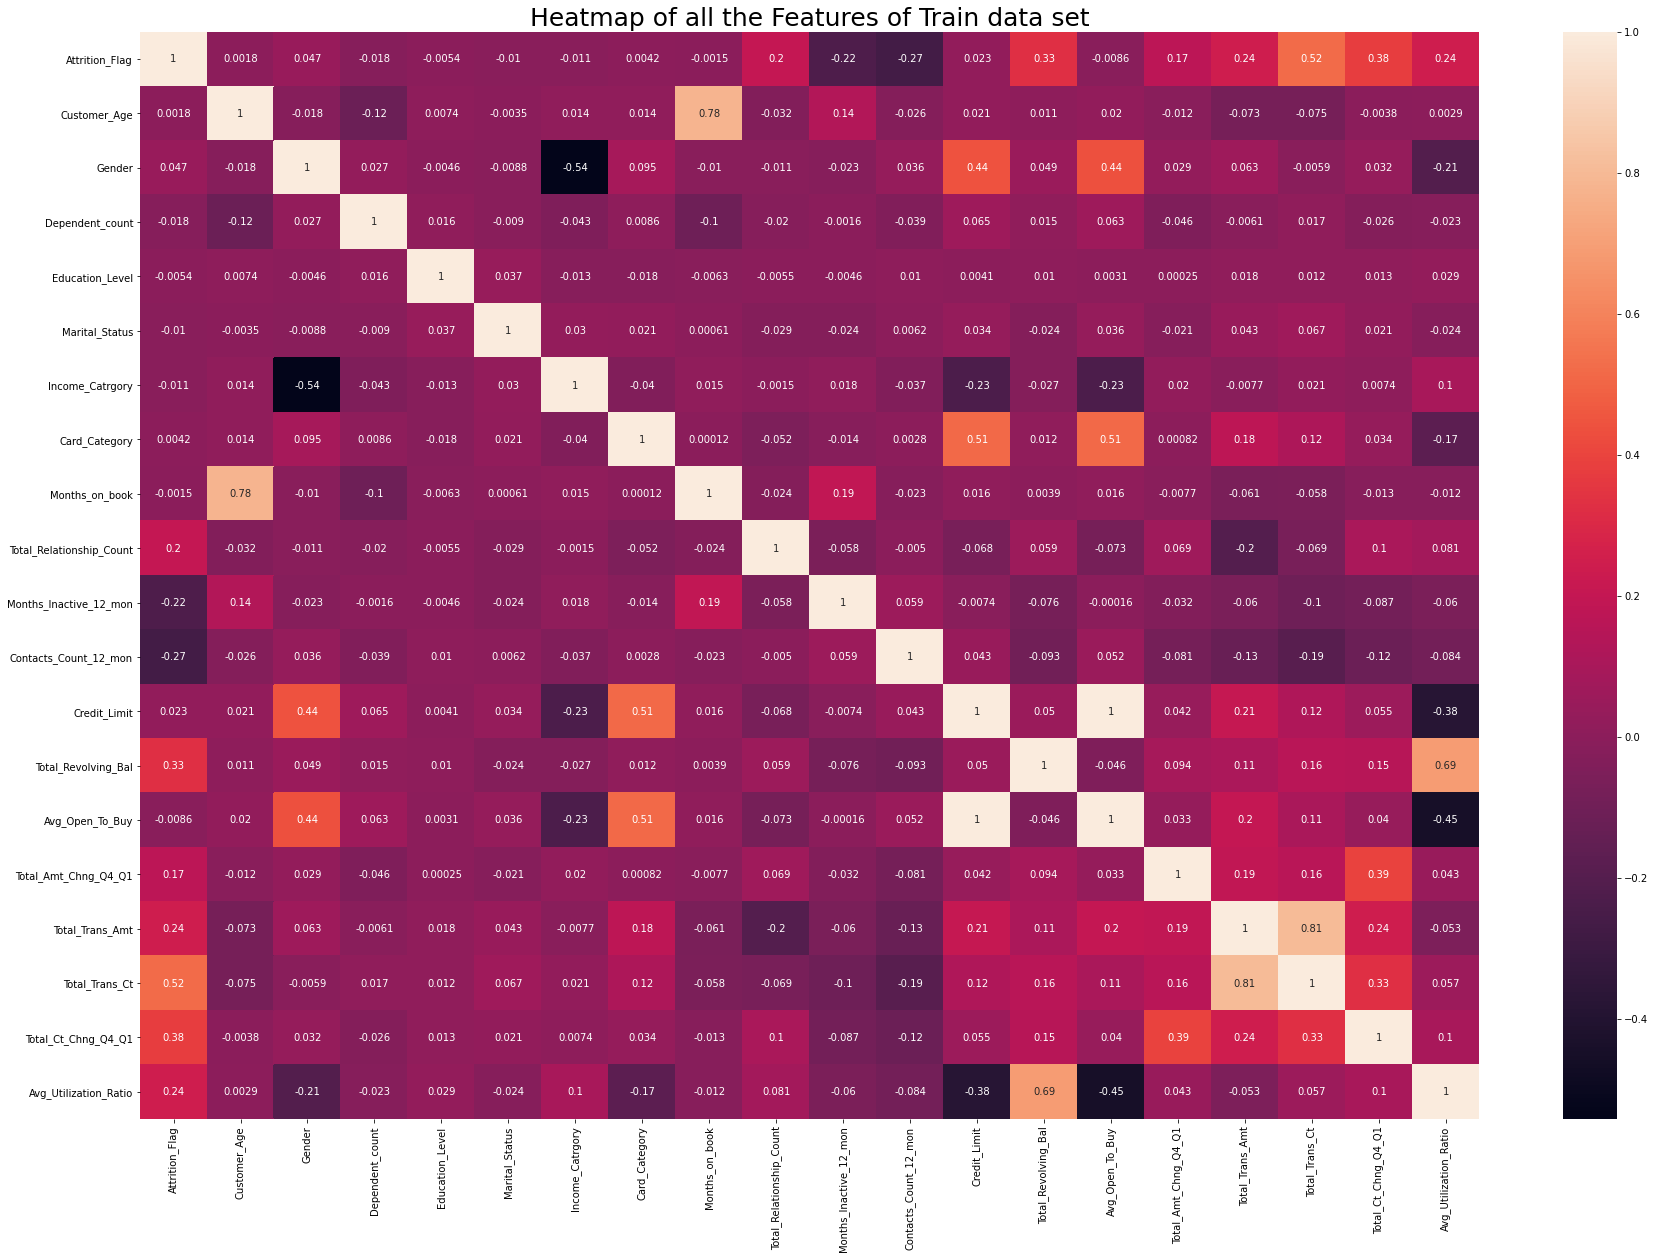

In [ ]:
# Correlation with sns heatmap
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, )
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);
plt.show()

In [ ]:
print("Find most important features relative to Attrition-target")
corr = df.corr()
corr.sort_values(["Attrition_Flag"], ascending = False, inplace = True)
print(corr.Attrition_Flag)

Find most important features relative to Attrition-target
Attrition_Flag              1.000000
Total_Trans_Ct              0.520814
Total_Ct_Chng_Q4_Q1         0.379293
Total_Revolving_Bal         0.326157
Total_Trans_Amt             0.244218
Avg_Utilization_Ratio       0.241357
Total_Relationship_Count    0.198985
Total_Amt_Chng_Q4_Q1        0.170793
Gender                      0.046825
Credit_Limit                0.022653
Card_Category               0.004225
Customer_Age                0.001787
Months_on_book             -0.001518
Education_Level            -0.005416
Avg_Open_To_Buy            -0.008607
Marital_Status             -0.010135
Income_Catrgory            -0.011296
Dependent_count            -0.018011
Months_Inactive_12_mon     -0.222911
Contacts_Count_12_mon      -0.268905
Name: Attrition_Flag, dtype: float64


# Standarization using StandarScale

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_resampled)
x_resampled = scaler.transform(x_resampled)
x_test = scaler.transform(x_test)

In [ ]:
#AFTER SCALING USING MINMAXSCALER
df = pd.DataFrame(x_resampled)
df = df.set_axis(['Customer_Age','Gender', 'Dependent_count','Education_Level','Marital_Status','Income_Catrgory','Card_Category','Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], axis=1, inplace=False)
df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Catrgory,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.489362,0.0,0.8,0.333333,0.000000,0.8,0.0,0.697674,0.4,0.166667,0.666667,0.023874,0.398490,0.035407,0.333532,0.091164,0.263566,0.125740,0.450450
1,0.085106,1.0,0.0,0.333333,0.333333,0.2,0.0,0.232558,1.0,0.333333,0.666667,0.079350,0.000000,0.117637,0.231297,0.397655,0.465116,0.190361,0.000000
2,0.234043,1.0,0.6,0.333333,0.333333,0.6,0.0,0.162791,0.4,0.500000,0.500000,0.206233,0.825189,0.179063,0.347839,0.103689,0.286822,0.167205,0.251251
3,0.702128,0.0,0.0,0.333333,0.666667,0.8,0.0,0.930233,1.0,0.500000,0.666667,0.102537,0.583631,0.097297,0.188972,0.163283,0.410853,0.201939,0.304304
4,0.127660,1.0,0.2,0.166667,0.666667,0.4,0.0,0.325581,0.8,0.500000,0.500000,0.259713,0.240763,0.272941,0.216692,0.096197,0.372093,0.176898,0.060060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10159,0.191489,1.0,0.4,0.333333,0.333333,0.6,0.0,0.325581,0.4,0.333333,0.500000,0.338739,0.000000,0.366239,0.117139,0.015842,0.085271,0.044965,0.000000
10160,0.340426,1.0,0.6,0.500000,0.333333,0.6,0.0,0.534884,0.0,0.500000,0.333333,0.651638,0.000000,0.666126,0.299255,0.420761,0.503876,0.211632,0.000000
10161,0.446809,0.0,0.6,1.000000,0.333333,0.8,0.0,0.558140,0.0,0.333333,0.333333,0.000000,0.000000,0.041587,0.223249,0.107692,0.201550,0.171244,0.000000
10162,0.340426,1.0,0.6,0.000000,0.333333,0.4,0.0,0.488372,0.4,0.500000,0.500000,0.363136,0.000000,0.389621,0.221162,0.028024,0.062016,0.015886,0.000000


In [ ]:
#keep it, one hot encoding
x = pd.DataFrame(xy)
x = x.set_axis(['Customer_Age', 'Dependent_count','Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Gender_F',
                'Gender_M','Education_Level_College','Education_Level_Doctorate','Education_Level_Graduate','Education_Level_High School',
                'Education_Level_Post-Graduate','Education_Level_Uneducated','Education_Level_Unknown', 'Marital_Status_Divorced','Marital_Status_Married',
                'Marital_Status_Single','Marital_Status_Unknown','Income_Category_$120K+', 'Income_Category_$40K-$60K','Income_Category_$60K-$80K',
                'Income_Category_$80K-$120K','Income_Category_Less than $40K','Income_Category_Unknown','Card_Category_Blue','Card_Category_Gold',
                'Card_Category_Platinum', 'Card_Category_Silver'], axis=1, inplace=False)
display(x)

#Prediction Model 1
1. Using RandomOverSampler instead of SMOTE
2. Using Label Encoder instead of One Hot Encoding
3. Not droping any columns

##Decision Tree

{'criterion': 'entropy', 'max_depth': 18}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
Accuracy :  0.9350777585781288
Precision :  0.8850778688605099
Recall/ sensitivity :  0.8624120329414853
Specificity :  0.8624120329414853
Confusion matrix :
[[3309  109]
 [ 154  479]]
Plot Confusion Matrix :


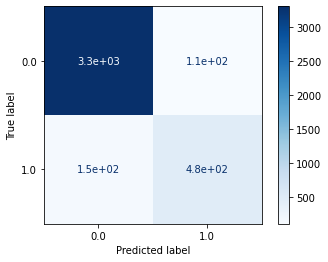

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
df = pd.DataFrame(data=y)
y = df.set_axis(['Attrition_Flag'], axis=1)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Existing Customer',0)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Attrited Customer',1)
#Label Encoder for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=123)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

#PREDICTION MODEL DECISION TREE
dt=DecisionTreeClassifier(random_state=123)

grid_values = {'max_depth': [i for i in range(1,22)],'criterion':['gini', 'entropy']}
grid_dt = GridSearchCV(dt, param_grid = grid_values,scoring = 'accuracy', cv=10,n_jobs = 10)
grid_dt.fit(x_resampled, y_resampled)

#Predict values based on new parameters
y_pred = grid_dt.predict(x_test)

#best hyperparameters
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)
#print(dt.tree_.max_depth)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_dt, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##KNN

{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Accuracy :  0.8662058750925697
Precision :  0.7470171073756287
Recall/ sensitivity :  0.7147602553898744
Specificity :  0.7147602553898744
Confusion matrix :
[[ 313  320]
 [ 222 3196]]
Plot Confusion Matrix :


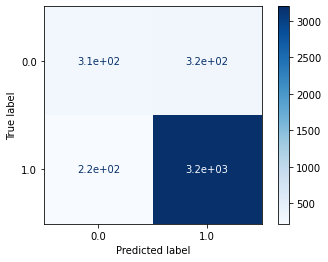

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def evaluasi_model(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1, inplace=False)
#Onehot encoding for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=123)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)
#sc = StandardScaler()
#x_resampled = sc.fit_transform(x_resampled)
#x_test = sc.fit_transform(x_test)

#PREDICTION MODEL KNN
knn = KNeighborsClassifier()

grid_values_knn = {'n_neighbors':[1,3,5,7,9,11,13,15]}
grid_knn = GridSearchCV(knn, param_grid = grid_values_knn,scoring = 'accuracy', cv=10,n_jobs = 10)
grid_knn.fit(x_resampled, y_resampled)

#Predict values based on new parameters
y_pred = grid_knn.predict(x_test)

#best hyperparameters
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_knn, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Logistic Regression



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1, inplace=False)
#Onehot encoding for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
sc = StandardScaler()
x_resampled = sc.fit_transform(x_resampled)
x_test = sc.fit_transform(x_test)

#PREDICTION MODEL LR
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

grid_values_lr =  {'C':[0.1,0.5,1,2,3]}
grid_lr = GridSearchCV(logreg, param_grid = grid_values_lr,scoring = 'accuracy', cv=10,n_jobs = 10)
grid_lr.fit(x_resampled, y_resampled)

#Predict values based on new parameters
y_pred = grid_lr.predict(x_test)

#best hyperparameters
print(grid_lr.best_params_)
print(grid_lr.best_estimator_)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_lr, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Support Vector Machine

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1, inplace=False)
#Onehot encoding for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
sc = StandardScaler()
x_resampled = sc.fit_transform(x_resampled)
x_test = sc.fit_transform(x_test)

#PREDICTION MODEL SVM

# RBF SVM
svc = svm.SVC(kernel='rbf', C=1).fit(x_resampled, y_resampled)

#Data Test
y_pred = svc.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(svc, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Ensemble

###Bagging

Accuracy :  0.8231597845601436
Precision :  0.7354091785745595
Recall/ sensitivity :  0.8799432863274065
Specificity :  0.8799432863274065
Confusion matrix :
[[ 351   13]
 [ 381 1483]]
Plot Confusion Matrix :


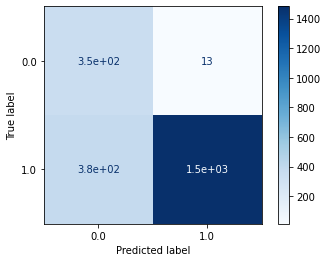

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1, inplace=False)
#Onehot encoding for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
sc = StandardScaler()
x_resampled = sc.fit_transform(x_resampled)
x_test = sc.fit_transform(x_test)

#Prediction Model Bagging Classifier (Training)
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42)
clf.fit(x_resampled, y_resampled)

#Data Test
y_pred = clf.predict(x_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###Random Forest Classifier

Accuracy :  0.9536942458290772
Precision :  0.9131629504180361
Recall/ sensitivity :  0.9186813186813187
Specificity :  0.9186813186813187
Confusion matrix :
[[2385   72]
 [  64  416]]
Plot Confusion Matrix :


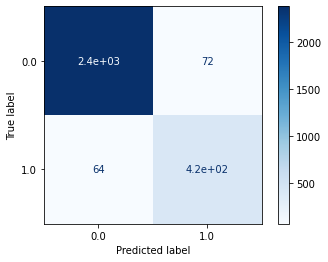

In [ ]:
#normalization with minmax scaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
df = pd.DataFrame(data=y)
y = df.set_axis(['Attrition_Flag'], axis=1)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Existing Customer',0)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Attrited Customer',1)
#Label Encoder for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.29, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

#Prediction Model Using RFC

rfc = RandomForestClassifier(max_depth = 10, random_state=42)
rfc.fit(x_resampled, y_resampled)
y_pred = rfc.predict(x_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(rfc, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
# WITH NORMALIZATION
# acc training
print('Random Forest Accuracy training ',rfc.score(x_resampled,y_resampled))    
# acc testing
print('Random Forest Accuracy test ',rfc.score(x_test,y_test)) 

Random Forest Accuracy training  1.0
Random Forest Accuracy test  0.9502894109635682


Accuracy :  0.928552870875552
Precision :  0.853771979580261
Recall/ sensitivity :  0.9157219879726274
Specificity :  0.9157219879726274
Confusion matrix :
[[ 564   65]
 [ 210 3010]]
Plot Confusion Matrix :


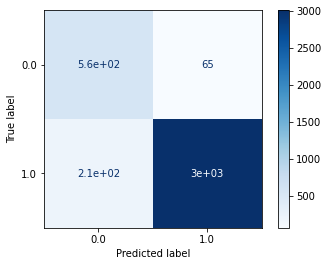

In [ ]:
#Without Droping Column
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1, inplace=False)
#Label Encoder for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.38, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
sc = StandardScaler()
x_resampled = sc.fit_transform(x_resampled)
x_test = sc.fit_transform(x_test)

#Prediction Model Using RFC
clf1 = RandomForestClassifier(max_depth = 10,random_state=42)
clf1.fit(x_resampled, y_resampled)
y_pred = clf1.predict(x_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(clf1, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
# acc training
print('Random Forest Accuracy training ',clf1.score(x_resampled,y_resampled))    
# acc testing
print('Random Forest Accuracy test ',clf1.score(x_test,y_test)) 

Random Forest Accuracy training  0.9918560606060606
Random Forest Accuracy test  0.928552870875552


##Boosting

###AdaBoosting

Accuracy :  0.9341888779203685
Precision :  0.8643747445852064
Recall/ sensitivity :  0.9184811563685258
Specificity :  0.9184811563685258
Confusion matrix :
[[ 444   52]
 [ 148 2395]]
Plot Confusion Matrix :


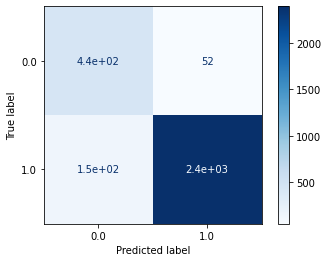

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1, inplace=False)
#Onehot encoding for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

#Prediction Model Using AdaBoosting
clf2 = AdaBoostClassifier(random_state=42)
clf2.fit(x_resampled, y_resampled)
y_pred = clf2.predict(x_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(clf2, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()


###GradientBoostingClassifier

Accuracy :  0.956071076011846
Precision :  0.9021840747904578
Recall/ sensitivity :  0.9491128978550074
Specificity :  0.9491128978550074
Confusion matrix :
[[1630   69]
 [  20  307]]
Plot Confusion Matrix :


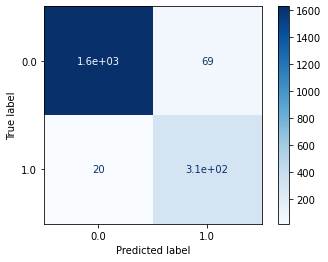

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
df = pd.DataFrame(data=y)
y = df.set_axis(['Attrition_Flag'], axis=1)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Existing Customer',0)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Attrited Customer',1)
#Onehot encoding for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

#Prediction Model Using AdaBoosting
clf3 = GradientBoostingClassifier(random_state=42)
clf3.fit(x_resampled, y_resampled)
y_pred = clf3.predict(x_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(clf3, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()


In [ ]:
# acc training
print('Accuracy training ',clf3.score(x_resampled,y_resampled))    
# acc testing
print('Accuracy test ',clf3.score(x_test,y_test)) 

Accuracy training  0.9714747831201294
Accuracy test  0.956071076011846


##XGBoost

Accuracy :  0.951931330472103
Precision :  0.8917476113163887
Recall/ sensitivity :  0.953272604588394
Specificity :  0.953272604588394
Confusion matrix :
[[1855   95]
 [  17  363]]
Plot Confusion Matrix :


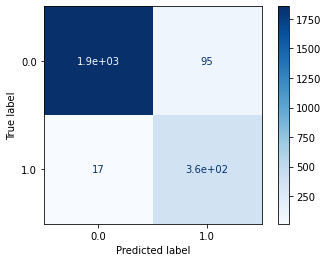

In [ ]:
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
df = pd.DataFrame(data=y)
y = df.set_axis(['Attrition_Flag'], axis=1)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Existing Customer',0)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Attrited Customer',1)
#Onehot encoding for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

#Prediction Model Using XGBoost
clf4 = xgb.XGBClassifier(random_state=42)
clf4.fit(x_resampled, y_resampled)
y_pred = clf4.predict(x_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(clf4, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()


In [ ]:
# acc training
print('Accuracy training ',clf4.score(x_resampled,y_resampled))    
# acc testing
print('Accuracy test ',clf4.score(x_test,y_test)) 

Accuracy training  0.9706106870229008
Accuracy test  0.951931330472103


##Stacking

Accuracy :  0.9000789889415481
Precision :  0.9306821761667924
Recall/ sensitivity :  0.7038308143586639
Specificity :  0.7038308143586639
Confusion matrix :
[[ 172  247]
 [   6 2107]]
Plot Confusion Matrix :


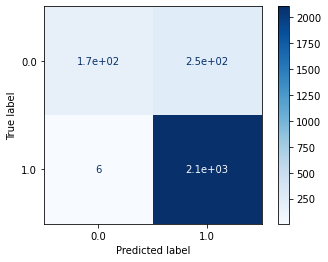

In [ ]:
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1, inplace=False)
#Onehot encoding for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

#Prediction Model Using Stacking
estimators = [
     ('svc', SVC()),
     ('knn', KNeighborsClassifier()),
     ('rf', RandomForestClassifier()),
     ]
clf5 = StackingClassifier(
      estimators=estimators, final_estimator=xgb.XGBClassifier()
      )
clf5.fit(x_resampled, y_resampled)
y_pred = clf5.predict(x_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(clf5, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()



3 Best Algorithm So far
1. Random Forest Classifier : Accuracy 95%, Recall 91% 
2. XGBoost : Accuracy : Accuracy 95%, Recall 95%
3. Gradient Boosting : Accuracy 95%, Recall 94%


#Prediction Model 2
1. Oversampling using RandomOverSampler
2. Independent Variable using One Hot Encoding
3. Not Droping any columns

## Decision Tree

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1)
#Onehot encoding for Independent Variable
# Dummies (One hot encoding menggunakan pandas)
x = pd.get_dummies(x)

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
sc = StandardScaler()
x_resampled = sc.fit_transform(x_resampled)
x_test = sc.fit_transform(x_test)

#PREDICTION MODEL DECISION TREE
dt=DecisionTreeClassifier(random_state=123)

grid_values = {'max_depth': [i for i in range(1,60)],'criterion':['gini', 'entropy']}
grid_dt = GridSearchCV(dt, param_grid = grid_values,scoring = 'accuracy', cv=10,n_jobs = 10)
grid_dt.fit(x_resampled, y_resampled)

#Predict values based on new parameters
y_pred = grid_dt.predict(x_test)

#best hyperparameters
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_dt, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Ensemble

###Random Forest Classifier

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Columns to be dropped
drop_columns = ['CLIENTNUM',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                'Avg_Open_To_Buy', 'Card_Category','Education_Level']
# Remove CLIENTNUM and the Naive_Bayes_Classifiers
data = data.drop(drop_columns,errors='ignore',axis=1)

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1)
#Onehot encoding for Independent Variable
# Dummies (One hot encoding menggunakan pandas)
x = pd.get_dummies(x)

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
sc = StandardScaler()
x_resampled = sc.fit_transform(x_resampled)
x_test = sc.fit_transform(x_test)

clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf1.fit(x_resampled, y_resampled)
y_pred = clf1.predict(x_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(clf1, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1)
#Onehot encoding for Independent Variable
# Dummies (One hot encoding menggunakan pandas)
x = pd.get_dummies(x)

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.39, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
sc = StandardScaler()
x_resampled = sc.fit_transform(x_resampled)
x_test = sc.fit_transform(x_test)

clf1 = RandomForestClassifier(n_estimators=10, random_state=42)
clf1.fit(x_resampled, y_resampled)
y_pred = clf1.predict(x_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(clf1, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()



##XGBoost

Accuracy :  0.9518716577540107
Precision :  0.892539282270796
Recall/ sensitivity :  0.9542130402693285
Specificity :  0.9542130402693285
Confusion matrix :
[[ 385   17]
 [ 100 1929]]
Plot Confusion Matrix :


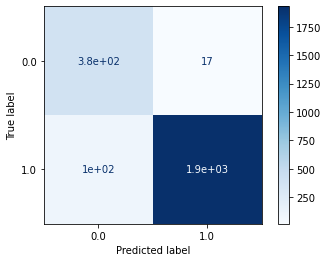

In [ ]:
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(data=y)
y = y.set_axis(['Attrition_Flag'], axis=1)
#Onehot encoding for Independent Variable
# Dummies (One hot encoding menggunakan pandas)
x = pd.get_dummies(x)

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.24, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

#Prediction Model Using XGBoost
clf4 = xgb.XGBClassifier()
clf4.fit(x_resampled, y_resampled)
y_pred = clf4.predict(x_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(clf4, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

#Feature Selection

##Embedded

Sebelum feature selection  (12086, 19)
Setelah feature selection  (12086, 5)
Score of features  [0.02623409 0.05072066 0.         0.00439115 0.02652374 0.00433216
 0.         0.02110056 0.09539713 0.03978942 0.03361785 0.01057455
 0.15409195 0.02357787 0.03873524 0.07072642 0.31751907 0.05893999
 0.02372824]
0.05263158


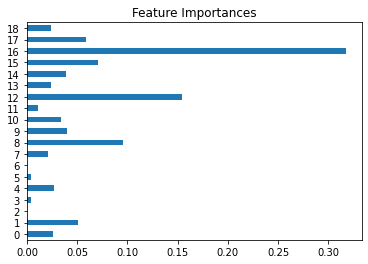

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.iloc[:, 1:]
y = data.iloc[:, 0]
#Label encoder for Target variable : Attrition_Flag
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(data=y)
y = df.set_axis(['Attrition_Flag'], axis=1)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Existing Customer',0)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Attrited Customer',1)
#Label Encoder for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.29, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

#Prediction Model Using RFC

clf4 = xgb.XGBClassifier(random_state=42)
clf4 = clf4.fit(x_resampled, y_resampled)
embed = SelectFromModel(clf4, prefit=False)
embed.fit(x_resampled, y_resampled)
x_resampled_new = embed.transform(x_resampled)


x_test_new = embed.transform(x_test)

print('Sebelum feature selection ', x_resampled.shape)
print('Setelah feature selection ', x_resampled_new.shape)
print('Score of features ', clf4.feature_importances_)
print(np.mean(clf4.feature_importances_))
feat_importances = pd.Series(clf4.feature_importances_, index=x_df.columns)
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

Accuracy  0.9448416751787538
Precision  0.8824458675425824
Recall  0.9351826414326414
Confusion matrix  [[2333  124]
 [  38  442]]


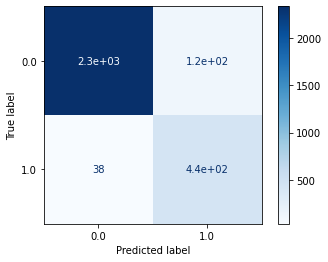

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#Prediction Model Using RFC
clf4 = xgb.XGBClassifier(random_state=42)
clf4.fit(x_resampled_new, y_resampled)
y_pred = clf4.predict(x_test_new)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf4, x_test_new, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
# WITH NORMALIZATION
# acc training
print('Random Forest Accuracy training ',rfc1.score(x_resampled_new,y_resampled))    
# acc testing
print('Random Forest Accuracy test ',rfc1.score(x_test_new,y_test)) 

Random Forest Accuracy training  0.9824590435214298
Random Forest Accuracy test  0.9319033026898196


##RFE

Sebelum feature selection  (12086, 19)
Setelah feature selection  (12086, 10)
Score of features  [ 4  1  2  9  3 10  7  5  1  1  1  8  1  1  1  1  1  1  6]


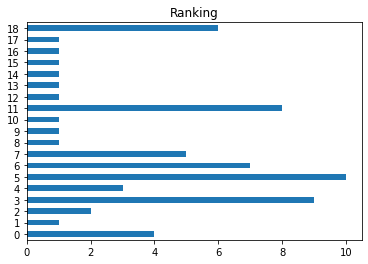

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.drop(['Attrition_Flag'],axis=1)
y = data['Attrition_Flag']
#Label encoder for Target variable : Attrition_Flag
df = pd.DataFrame(data=y)
y = df.set_axis(['Attrition_Flag'], axis=1)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Existing Customer',0)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Attrited Customer',1)
#Label Encoder for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.29, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

estimator = SVC(kernel="linear")
wrapper = RFE(estimator, n_features_to_select=10)
wrapper.fit(x_resampled, y_resampled)
x_resampled_new2 = wrapper.transform(x_resampled)
x_test_new2 = wrapper.transform(x_test)

print('Sebelum feature selection ', x_resampled.shape)
print('Setelah feature selection ', x_resampled_new2.shape)
print('Score of features ', wrapper.ranking_)

feat_importances = pd.Series(wrapper.ranking_, index=x_df.columns)
feat_importances.plot(kind='barh')
plt.title('Ranking')
plt.show()

{'criterion': 'entropy', 'max_depth': 18}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy  0.951310861423221
Precision  0.9228139172335601
Recall  0.8946263227513227
Confusion matrix  [[2405   52]
 [  91  389]]


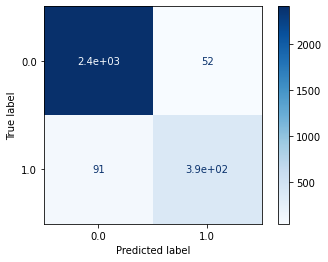

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

rfc = RandomForestClassifier(random_state=42)
grid_values = {'max_depth': [i for i in range(1,22)],'criterion':['gini', 'entropy']}
rfc2 = GridSearchCV(rfc, param_grid = grid_values,scoring = 'accuracy',n_jobs = 10)
rfc2.fit(x_resampled_new2, y_resampled)

#Predict values based on new parameters
y_pred = rfc2.predict(x_test_new2)

#best hyperparameters
print(rfc2.best_params_)
print(rfc2.best_estimator_)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(rfc2, x_test_new2, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
# WITH NORMALIZATION
# acc training
print('Random Forest Accuracy training ',rfc2.score(x_resampled_new2,y_resampled))    
# acc testing
print('Random Forest Accuracy test ',rfc2.score(x_test_new2,y_test)) 

Random Forest Accuracy training  0.9887473109382757
Random Forest Accuracy test  0.9489274770173647


##ANOVA

Sebelum feature selection  (13602, 19)
Setelah feature selection  (13602, 14)
Score of features  [4.90407220e+01 4.66791267e+01 7.20540873e+00 4.58533660e-01
 8.43950697e-02 1.69643147e+01 5.28871858e+00 2.28878360e+01
 6.49368420e+02 7.48578840e+02 1.19071362e+03 1.75247744e+01
 1.61718205e+03 1.99988452e-01 3.71464013e+02 1.01220362e+03
 5.45352784e+03 2.28389181e+03 8.71827829e+02]
Score of features  [2.62475419e-012 8.71718940e-012 7.27722491e-003 4.98321585e-001
 7.71431835e-001 3.83143032e-005 2.14790809e-002 1.73538582e-006
 5.74832079e-140 1.73782618e-160 3.31431748e-250 2.85372520e-005
 0.00000000e+000 6.54737289e-001 1.09953470e-081 2.58326989e-214
 0.00000000e+000 0.00000000e+000 8.91778643e-186]


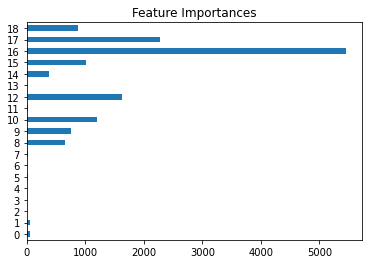

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
import matplotlib.pyplot as plt

### checking
data.isna().sum()
#Split data into dependent and independent variable
x = data.drop(['Attrition_Flag'],axis=1)
y = data['Attrition_Flag']
#Label encoder for Target variable : Attrition_Flag
df = pd.DataFrame(data=y)
y = df.set_axis(['Attrition_Flag'], axis=1)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Existing Customer',0)
y['Attrition_Flag']=y['Attrition_Flag'].replace('Attrited Customer',1)
#Label Encoder for Independent Variable
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
le = LabelEncoder()
for i in cat_features:
  x[i] = le.fit_transform(x[i])

x = x.astype(float).values
y = y.astype(float).values

#Menyeimbangkan Data Variable Target : Attrition Flag
over_sampling = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_resampled, y_resampled = over_sampling.fit_sample(x_train, y_train)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_resampled = mmc.fit_transform(x_resampled)
x_test = mmc.fit_transform(x_test)

#ANOVA
filter = SelectKBest(f_classif, k=14)
filter.fit(x_resampled, y_resampled)
x_resampled_new2 = filter.transform(x_resampled)
x_test_new2 = filter.transform(x_test)

print('Sebelum feature selection ', x_resampled.shape)
print('Setelah feature selection ', x_resampled_new2.shape)
print('Score of features ', filter.scores_)
print('Score of features ', filter.pvalues_)

feat_importances = pd.Series(filter.scores_, index=x_df.columns)
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

Accuracy  0.9471865745310958
Precision  0.8834664576490494
Recall  0.9438156641881446
Confusion matrix  [[1612   87]
 [  20  307]]


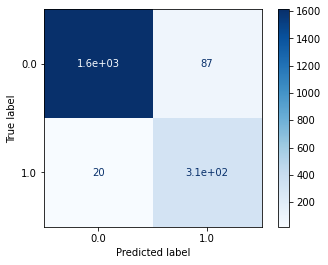

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb

model = xgb.XGBClassifier(random_state=42)
model.fit(x_resampled_new2, y_resampled)
y_pred = model.predict(x_test_new2)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test_new2, y_test, cmap=plt.cm.Blues)  
plt.show()